---
---
# <center> **Capacitação CD e IA**
---

## <center> **Dia 3 - Séries Temporais**

### <center> **Jones Egydio e Lucas Buk**
---
---

# **Setup**

In [ ]:
# Básicas
seed = 42 # Semente para repetibilidade
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [ ]:
# Importanto a base de dados - Banco Central
%%capture
!gdown --id 1EOlMkbgDrk0MERIFsNxYmTQZdHMK0JMX

In [ ]:
# Importanto a base de dados - DiRWA Newsletter
%%capture
!gdown --id 1v_ITCg_C91NUi_KjCqg61nC1ChiND6G8

In [ ]:
# Importanto a base de dados - DiRWA Chocolates - Café - Mobile
%%capture
!gdown --id 1cQIHhU06yMveOE5T6j_xreGeMY_Iv1Us
!gdown --id 1ppHZ3JdxQBL9cD1TXHtRsVxCnOYpsdRq
!gdown --id 1A9zMKeh6jOBNUKcbQ6UbuqmrNkAV5sxe
!gdown --id 1NdPPQgrhKE2TKGsWj5dhkWDeHYsH0mWe
!gdown --id 1d1yXXzVC0kCGR60nl3bjWB7RpFGPutSE

# **Introdução às Séries Temporais**

## **Definição e Conceitos Básicos**
- **Definição**: Uma série temporal é uma sequência de observações quantitativas feitas sequencialmente ao longo do tempo. Em termos matemáticos, uma série temporal pode ser representada como uma sequência de valores ${X_t}$, onde $t$ representa o índice temporal (que pode ser, por exemplo, minutos, dias, meses, anos, etc.), e $X_t$ é a variável de interesse observada no tempo $t$.

- **Características Importantes**:
  - **Dependência Temporal**: O valor em qualquer ponto $t$ é potencialmente dependente de valores em tempos anteriores. Esta dependência é crucial para métodos de previsão e análise.
  - **Estacionariedade vs. Não Estacionariedade**: Uma distinção fundamental em séries temporais, onde uma série estacionária tem propriedades estatísticas (como média e variância) que são constantes no tempo, enquanto uma não estacionária não tem.

- **Aplicações em Diferentes Campos**:
  - **Economia**: Modelagem e previsão de indicadores econômicos, como PIB, inflação, taxas de desemprego. Crucial para a formulação de políticas macroeconômicas e microeconômicas.
  - **Meteorologia**: Previsões climáticas, modelagem de fenômenos climáticos (como El Niño), análise de tendências de aquecimento global. Essencial para planejamento em agricultura, gestão de desastres, etc.
  - **Finanças**: Análise de séries temporais de preços de ativos, modelagem de risco de mercado, desenvolvimento de estratégias de trading. Central para investimentos e gerenciamento de portfólio.
  - **Ciências Sociais**: Estudo de tendências demográficas, análises eleitorais. Importante para entender comportamentos sociais e políticos ao longo do tempo.

---
## **Classificação**:
Define uma série temporal como um conjunto de observações ${Y(t), t \in T}$, onde $Y$ é a variável de interesse e $T$ é o conjunto de índices de tempo.

### **Tipos de Séries Temporais:**
1. **Discreta**:
   - **Conjunto $T$**: Representado por ${t_1, t_2, ..., t_n}$ — uma coleção de momentos específicos no tempo.
   - **Exemplo**: Exportações mensais de 1970 a 1980, com os índices de tempo dados como ${01/1970, 02/1970, ..., 11/1980, 12/1980}$.
   - **Notação**: $Y_t$ para representar o valor da variável de interesse no tempo $t$.

2. **Contínua**:
   - **Conjunto $T$**: Um intervalo de tempo ${t : t_1 < t < t_2}$, indicando uma série temporal medida continuamente entre dois pontos.
   - **Exemplo**: Registro da maré no Rio durante 1 ano, com o intervalo de tempo $T = [0, 24]$ se a unidade de tempo é a hora.
   - **Notação**: $Y(t)$ para denotar o valor da variável contínua de interesse no tempo contínuo $t$.

3. **Multivariada**:
   - **Observações**: São vetores $\vec{Y}(t), t \in T$, onde cada vetor contém múltiplas variáveis observadas no tempo $t$.
   - **Exemplo**: Vendas semanais $Y_1(t)$ e gastos com propaganda $Y_2(t)$, onde cada $t$ representa um vetor de observações para diferentes variáveis no mesmo momento.



$Y$ pode também ser discreto ou contínuo. Muitas vezes, $Y$ é discreto mas pode ser tratado como contínuo.

Ex: Número de casos notificados de COVID-19. Nesse curso, séries são univariadas, discretas e observada em tempos equiespaçados.

Podemos identificar $ T $ com $\{1, 2, ..., n\}$"


---
## **Objetivos de uma análise de séries temporais**

Os principais objetivos são:

1. Compreender o mecanismo gerador da série;
2. Predizer o comportamento futuro da série.

Compreender o mecanismo da série possibilita:

- Descrever efetivamente o comportamento da série;
- Encontrar periodicidades na série;
- Tentar obter razões para o comportamento da série (possivelmente através de variáveis auxiliares);
- Controlar a trajetória da série.

Predizer o futuro possibilita:

- Fazer planos a longo, médio e curto prazo;
- Tomar decisões apropriadas.

Objetivos (1) e (2) estão ligados. É possível ocorrer bem rotineiramente se o modelo é adequado, a não ser nos raros casos de modelos determinísticos.

Futuro envolve incerteza ⇒ previsões não são perfeitas.

Objetivo é reduzir ao máximo os erros de previsão.



---
## **Características importantes**

1. **Tendência**: A tendência em uma série temporal é uma direção sustentada para cima ou para baixo nos dados ao longo do tempo. Não deve ser confundida com flutuações aleatórias ou padrões sazonais. Por exemplo, uma tendência de longo prazo no aumento da temperatura global é uma indicação das mudanças climáticas. Outro exemplo é a tendência de queda no número de mortes por poluição do ar ao longo de várias décadas, refletindo melhorias na legislação ambiental e tecnologias mais limpas.

2. **Sazonalidade**: Refere-se a flutuações que ocorrem em intervalos regulares devido a fatores sazonais. Por exemplo, as vendas de varejo podem aumentar significativamente durante o período de festas de fim de ano e diminuir em janeiro. Outro exemplo é o aumento nas vendas de produtos como protetor solar e trajes de banho durante os meses de verão.

3. **Ciclicidade**: Enquanto a sazonalidade se refere a padrões que ocorrem em intervalos fixos, a ciclicidade envolve flutuações que não são de período fixo e muitas vezes estão ligadas a fenômenos econômicos mais amplos, como ciclos econômicos de expansão e recessão. Por exemplo, o ciclo de negócios pode levar a aumentos e diminuições na produção industrial que não estão ligados a uma estação ou evento específico.

4. **Variabilidade**: A variabilidade em uma série temporal refere-se à volatilidade nos dados, que pode ser devido à variação inerente ao fenômeno sendo medido ou a fatores externos aleatórios. Um exemplo de alta variabilidade pode ser encontrado nos mercados de ações, onde os preços das ações podem flutuar drasticamente em resposta a eventos como anúncios de lucros ou mudanças nas taxas de juros.

5. **Nível**: O nível de uma série temporal é o valor médio em torno do qual os dados flutuam. Por exemplo, se uma empresa introduz um novo produto que se torna popular, o nível de vendas pode subir substancialmente e permanecer alto em comparação com o período antes da introdução do produto.

6. **Estacionariedade**: Uma série temporal é considerada estacionária se suas propriedades estatísticas, como a média e a variância, são constantes ao longo do tempo. Muitos modelos de previsão temporal requerem que a série seja estacionária. Um exemplo de série não estacionária é o PIB de um país, que pode crescer ao longo do tempo, aumentando a média a cada ano.

7. **Autocorrelação**: A autocorrelação é a correlação de uma série temporal com suas próprias versões passadas. Por exemplo, as temperaturas de um dia são frequentemente autocorrelacionadas com as do dia anterior - se hoje está quente, há uma boa chance de que amanhã também esteja quente.

8. **Quebras Estruturais**: Uma quebra estrutural ocorre quando há uma alteração súbita e duradoura nos padrões da série temporal. Por exemplo, uma mudança drástica na política monetária pode levar a uma quebra estrutural em séries de dados financeiros, como o comportamento dos preços de ações ou taxas de juros.

9. **Outliers**: Outliers são observações que se desviam significativamente do padrão geral da série temporal. Um exemplo clássico é um pico nas vendas causado por um evento inesperado, como um endosso de celebridade que não estava previsto no modelo de previsão de vendas.

10. **Dados Faltantes (Missing Data)**: Os dados faltantes ocorrem quando não há observações para um ou mais períodos de tempo. Por exemplo, um equipamento de medição pode falhar, resultando em falta de dados para algumas datas, ou uma loja pode não reportar vendas em determinados dias devido a um fechamento inesperado.


---
### **Séries Temporais Estacionárias**

Uma série temporal é considerada estacionária se suas propriedades estatísticas — como média, variância e autocorrelação — permanecem constantes ao longo do tempo. Isso não significa que a série não varie ao longo do tempo, mas sim que a maneira como ela varia não é dependente do tempo. Para que uma série temporal seja estritamente estacionária, ela deve satisfazer três critérios:

1. **Média Constante**: A média da série não muda com o tempo.
2. **Variância Constante**: A variância ou a volatilidade da série é a mesma em diferentes períodos de tempo.
3. **Covariância Constante**: A covariância entre os termos em intervalos iguais (lag k) é constante ao longo da série temporal.

Em outras palavras, uma série estacionária tem um comportamento previsível e uma estrutura que não muda com o tempo, o que a torna mais fácil de analisar e prever.

**Exemplo de Estacionariedade**: Uma série de retornos diários de um instrumento financeiro pode ser considerada estacionária se, ao longo de um período de tempo, a média e a variância dos retornos permanecerem consistentes, e a relação entre os retornos de um dia e os do dia seguinte permanecer estável.

### **Séries Temporais Não Estacionárias**

Uma série temporal não estacionária é aquela cujas propriedades estatísticas mudam ao longo do tempo. Isso pode acontecer por várias razões, como tendências, ciclos, sazonalidade e outros fatores. Séries temporais não estacionárias são mais comuns na prática e são mais desafiadoras de modelar e prever. Existem dois tipos principais de não estacionariedade:

1. **Não Estacionariedade em Média**: Quando a média da série muda ao longo do tempo. Isso geralmente acontece devido a uma tendência ou mudança estrutural nos dados.
2. **Não Estacionariedade em Variância**: Quando a variância da série muda ao longo do tempo, o que é conhecido como heterocedasticidade. Isso pode ser devido a períodos de alta volatilidade seguidos por períodos de baixa volatilidade.

**Exemplo de Não Estacionariedade**: As vendas mensais de uma loja de varejo que aumentam a cada ano, mostrando uma tendência ascendente clara, ou o PIB de um país crescendo ao longo do tempo, são exemplos de séries temporais não estacionárias.

Para usar muitos modelos de previsão de séries temporais, como ARIMA, é muitas vezes necessário transformar uma série não estacionária em estacionária, por exemplo, através da diferenciação ou aplicação de transformações logarítmicas.

A estacionariedade é uma suposição fundamental em muitos modelos estatísticos de séries temporais, pois muitos dos métodos clássicos de previsão são baseados na suposição de que as propriedades estatísticas da série não mudam ao longo do tempo.

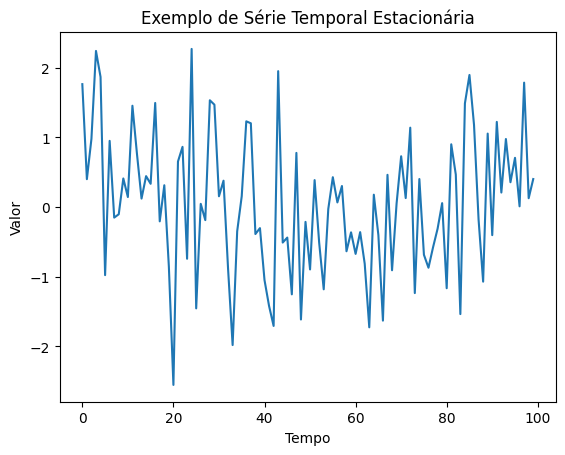

In [ ]:
#Para criar um gráfico de uma série temporal estacionária, você pode usar dados
#aleatórios que tenham uma média e variância constante:
# Gerar uma série temporal estacionária com ruído branco
np.random.seed(0)
data_estacionaria = np.random.normal(loc=0, scale=1, size=100)
serie_estacionaria = pd.Series(data_estacionaria)

# Plotar a série temporal estacionária
serie_estacionaria.plot()
plt.title('Exemplo de Série Temporal Estacionária')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

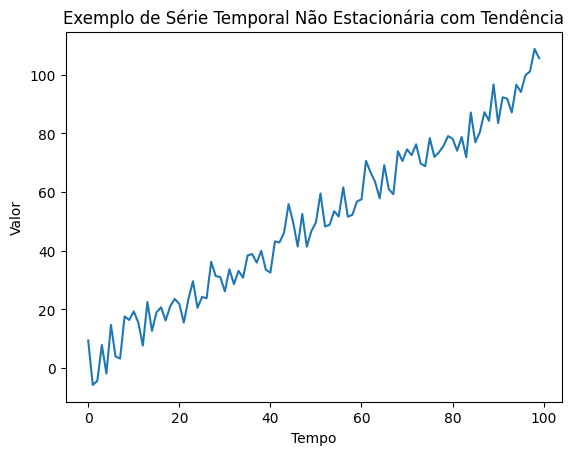

In [ ]:
#Para uma série temporal não estacionária com uma tendência, você pode usar uma
#combinação de números aleatórios com uma tendência crescente:
# Gerar uma série temporal não estacionária com uma tendência
time = np.arange(100)
data_nao_estacionaria = time + np.random.normal(loc=0, scale=5, size=100)
serie_nao_estacionaria = pd.Series(data_nao_estacionaria)

# Plotar a série temporal não estacionária
serie_nao_estacionaria.plot()
plt.title('Exemplo de Série Temporal Não Estacionária com Tendência')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

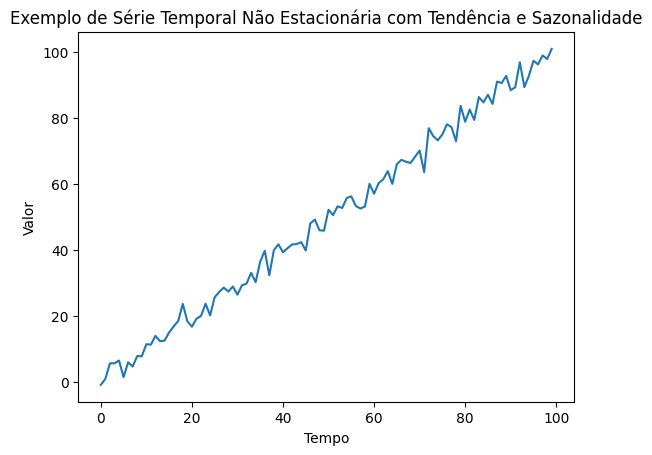

In [ ]:
#E para uma série temporal não estacionária com sazonalidade e tendência,
#você pode adicionar um componente sazonal aos dados:
# Gerar uma série temporal não estacionária com tendência e sazonalidade
sazonalidade = np.sin(2 * np.pi * time / 12)  # Sazonalidade mensal
data_sazonal = time + sazonalidade + np.random.normal(loc=0, scale=2.5, size=100)
serie_sazonal = pd.Series(data_sazonal)

# Plotar a série temporal não estacionária com sazonalidade
serie_sazonal.plot()
plt.title('Exemplo de Série Temporal Não Estacionária com Tendência e Sazonalidade')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

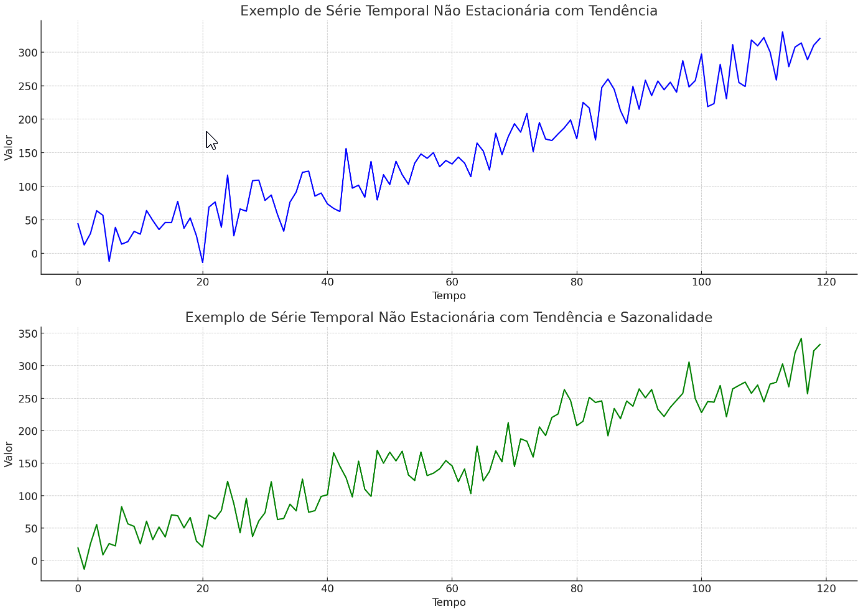

Os gráficos acima mostram dois exemplos de séries temporais não estacionárias:

1. **Com Tendência (Azul)**: Este gráfico mostra uma série temporal com uma tendência linear clara. A tendência é uma mudança sistemática na média da série temporal ao longo do tempo. Aqui, a tendência é positiva, indicando um aumento constante nos valores à medida que o tempo avança. A volatilidade dos dados ao redor da tendência linear é constante, o que significa que a variância dos dados não muda com o tempo, mas ainda assim, a presença da tendência faz com que a série seja não estacionária.

2. **Com Tendência e Sazonalidade (Verde)**: O segundo gráfico inclui não apenas uma tendência linear, mas também uma componente sazonal. A sazonalidade é representada pelo padrão sinusoidal que se repete ao longo do tempo, simulando, por exemplo, um aumento nas vendas durante determinadas épocas do ano ou padrões semelhantes que se repetem em intervalos regulares. Este gráfico reflete uma complexidade adicional, pois além da tendência que muda a média ao longo do tempo, a sazonalidade adiciona variações periódicas que também precisam ser consideradas na modelagem da série temporal.

Ambos os gráficos são exemplos de séries temporais não estacionárias, onde técnicas específicas, como a diferenciação ou modelos sazonais, podem ser necessárias para realizar previsões ou análises.

---
## **Modelos mais utilizados para tratamento de Séries Temporais**

1. **Modelos AR (AutoRegressive):**
   - **Definição**: Um modelo AR modela o valor atual da série temporal como uma combinação linear dos $ p $ valores anteriores $lags$ mais um termo de erro. Matematicamente, isso pode ser expresso como $ X_t = c + \sum_{i=1}^{p} \phi_i X_{t-i} + \epsilon_t $, onde $ c $ é uma constante, $ \phi $ são os parâmetros do modelo, e $ \epsilon_t $ é o termo de erro.
   - Frquentemente usado em séries estacionárias;
   - **Exemplo**: Um modelo AR é frequentemente usado para modelar séries temporais econômicas, como PIB ou preços de ações, onde se presume que os valores passados têm influência direta sobre os valores futuros.

2. **Modelos MA (Moving Average):**
   - **Definição**: Um modelo MA utiliza a média móvel dos termos de erro passados para modelar a série temporal. A equação de um modelo MA(q) é $ X_t = \mu + \epsilon_t + \sum_{i=1}^{q} \theta_i \epsilon_{t-i} $, onde $ \mu $ é a média da série, $ \theta $ são os parâmetros, e $ \epsilon_t $ são os termos de erro.
  - Frquentemente usado em séries estacionárias;
   - **Exemplo**: Modelos MA podem ser aplicados para ajustar flutuações de curto prazo em séries temporais financeiras, ajudando a suavizar 'choques' temporários.

3. **Modelos ARMA (AutoRegressive Moving Average):**
   - **Definição**: O ARMA combina aspectos dos modelos AR e MA. Ele modela a série temporal como uma combinação linear dos valores anteriores e dos termos de erro passados. A formulação de um modelo ARMA(p, q) é dada por $ X_t = c + \sum_{i=1}^{p} \phi_i X_{t-i} + \sum_{i=1}^{q} \theta_i \epsilon_{t-i} + \epsilon_t $.
  - Frquentemente usado em séries estacionárias;
   - **Exemplo**: ARMA é adequado para dados econômicos ou financeiros onde tanto os valores passados quanto os 'choques' passados são importantes para determinar a tendência atual.

4. **Modelos ARIMA (AutoRegressive Integrated Moving Average):**
   - **Definição**: O ARIMA adiciona o conceito de integração (diferenciação) ao ARMA para tornar a série temporal estacionária. Um modelo ARIMA(p, d, q) primeiro difere a série $ d $ vezes e, em seguida, aplica um modelo ARMA(p, q) à série diferenciada.
   - Frequentemente usado em séries com tendência e/ou sazonalidade;
   - **Exemplo**: ARIMA é amplamente utilizado em séries temporais econômicas não estacionárias, como vendas no varejo, onde a diferenciação pode remover tendências ou sazonalidades.

5. **Modelos SARIMA (Seasonal ARIMA):**
   - **Definição**: O SARIMA adiciona componentes sazonais ao ARIMA para modelar séries temporais com sazonalidade clara. Um modelo SARIMA(p, d, q)(P, D, Q)s inclui termos sazonais equivalentes aos termos não sazonais, mas aplicados ao período sazonal \( s \).
   - **Exemplo**: O SARIMA é ideal para séries temporais como vendas mensais de produtos sazonais, onde a diferenciação e os termos sazonais ajudam a modelar e prever padrões sazonais.

6. **Modelos VAR (Vector AutoRegression):**
   - **Definição**: Um modelo VAR é um sistema multivariado composto por várias equações AR, uma para cada variável endógena no sistema. Cada variável é modelada como uma combinação linear das lags de todas as variáveis no sistema.
   - **Exemplo**: VAR é útil para modelar a inter-relação entre séries temporais econômicas, como PIB, taxas de juros e inflação, onde cada variável pode afetar e ser afetada pelas outras.

7. **Modelos ARCH (Autoregressive Conditional Heteroskedasticity) e GARCH (Generalized ARCH):**
   - **Definição**: ARCH e GARCH são modelos projetados para capturar a volatilidade em clusters - períodos de alta volatilidade seguidos por períodos de baixa volatilidade. GARCH é uma extensão que adiciona uma média móvel dos termos de volatilidade passados.
   - **Exemplo**: Eles são comumente usados em dados financeiros, como para modelar a volatilidade dos retornos de ações, onde a variância do termo de erro não é constante ao longo do tempo.

8. **Modelos de Suavização Exponencial:**
   - **Definição**: Métodos de suavização exponencial aplicam ponderações que diminuem exponencialmente ao longo do tempo. O mais simples é a Suavização Exponencial Simples, e variações como Holt e Holt-Winters adicionam componentes de tendência e sazonalidade.
   - **Exemplo**: Esses modelos são usados para previsão de demanda de curto prazo em gestão de estoque, onde os dados mais recentes são mais indicativos do futuro imediato.

9. **Modelos de Decomposição:**
   - **Definição**: A decomposição separa uma série temporal em componentes de tendência, sazonalidade e resíduos. A decomposição STL usa Loess (regressão local ponderada) para ajustar os componentes.
   - **Exemplo**: Decomposição é útil em séries temporais de tráfego de sites, onde se quer entender os componentes subjacentes das variações diárias ou semanais.

10. **Modelos de Espaço de Estado e Filtro de Kalman:**
    - **Definição**: Modelos de espaço de estado representam séries temporais através de um conjunto de equações que descrevem a evolução do estado de um sistema. O Filtro de Kalman é um algoritmo recursivo para estimar o estado de um sistema dinâmico a partir de medições ruidosas.
    - **Exemplo**: Usados em navegação e controle de processos, podem ser aplicados em séries financeiras para ajustar modelos dinâmicos que mudam com o tempo.

11. **Modelos de Machine Learning e Deep Learning:**
    - **Definição**: Esses modelos usam algoritmos complexos, como redes neurais, para capturar padrões não-lineares e interações complexas nos dados. LSTMs e GRUs são variantes de RNNs que podem capturar dependências de longo prazo.
    - **Exemplo**: LSTMs são usadas em previsões de séries temporais de tráfego ou demanda de energia, onde padrões complexos e sequências temporais longas são comuns.

Cada um desses modelos tem seus próprios pontos fortes e fracos e a escolha do modelo apropriado depende da natureza dos dados e do contexto da análise.

---
#### **Exemplo 1: Análise de Séries Temporais em Índices de Mercado de Ações**

#### **Tendências e Ciclos Econômicos**
- **Tendências**: Representam movimentos de longo prazo em índices de ações. Estas podem ser ascendentes (bull market) ou descendentes (bear market) e são frequentemente influenciadas por fatores macroeconômicos (como crescimento do PIB, políticas monetárias) e microeconômicos (como performance corporativa).
- **Ciclos Econômicos**: São flutuações naturais na atividade econômica caracterizadas por períodos de expansão e recessão. Estes ciclos afetam o desempenho das empresas e, por consequência, os índices de mercado. Por exemplo, em períodos de expansão econômica, os índices de ações tendem a crescer, enquanto em recessões, observa-se frequentemente um declínio.

#### **Estacionariedade**
- **Definição**: Uma série temporal é dita estacionária se suas propriedades estatísticas (média, variância, autocorrelação etc.) permanecem constantes ao longo do tempo.
- **Importância em Finanças**: A estacionariedade é crucial em séries temporais financeiras, pois muitos modelos preditivos assumem que a série é estacionária. Em séries não estacionárias, pode ser necessário transformar os dados (por exemplo, diferenciando-os) para alcançar a estacionariedade.

#### **Choques e Volatilidade**
- **Choques**: Refere-se a eventos inesperados que causam movimentos significativos nos índices de mercado. Exemplos incluem eventos geopolíticos, desastres naturais, ou crises financeiras. Choques podem ser modelados como "saltos" em séries temporais, criando descontinuidades ou mudanças abruptas.
- **Volatilidade**: É a medida de variação do preço de um ativo financeiro ao longo do tempo, refletindo o grau de incerteza ou risco. Em séries temporais, a volatilidade pode ser observada por meio de amplas flutuações nos valores do índice. A modelagem da volatilidade, como através dos modelos GARCH (Generalized Autoregressive Conditional Heteroskedasticity), é essencial para entender e prever o comportamento dos preços dos ativos.


---
#### **Exemplo 2: Análise de Séries Temporais em Dados de Temperatura Global**

#### **Descrição dos Dados**
- **Dados de Temperatura Global**: Estes dados consistem em registros de temperaturas (normalmente médias) coletados em uma base mensal ou anual em diversas localidades ao redor do mundo. Estas séries temporais podem abranger várias décadas, fornecendo uma visão abrangente das tendências climáticas ao longo do tempo.

#### **Tendências de Longo Prazo**
- **Identificação de Tendências**: A primeira etapa na análise de séries temporais de temperatura é identificar tendências de longo prazo. Isto é geralmente realizado através de métodos de suavização como médias móveis ou ajustes de modelos lineares ou não lineares para capturar a tendência geral.
- **Padrões Observados**: Em muitos conjuntos de dados globais de temperatura, observa-se uma tendência clara de aumento das temperaturas ao longo das últimas décadas, evidenciando o aquecimento global.
- **Desafios Analíticos**: Dada a natureza complexa do clima, a modelagem de séries temporais de temperatura pode exigir considerar fatores como variações geográficas, mudanças nos métodos de coleta de dados, e influências externas (como atividades vulcânicas).

#### **Importância da Análise de Séries Temporais no Contexto de Mudanças Climáticas**
- **Entendimento das Mudanças Climáticas**: A análise de séries temporais permite aos cientistas e pesquisadores entender melhor como o clima da Terra está mudando ao longo do tempo. Isso é fundamental para modelar os impactos potenciais das mudanças climáticas e desenvolver estratégias para mitigar esses efeitos.
- **Modelagem e Previsão**: As técnicas de séries temporais são usadas para criar modelos climáticos que podem prever futuras condições climáticas baseadas em tendências históricas. Estes modelos são cruciais para planejamento em setores como agricultura, gestão de recursos hídricos, e política ambiental.
- **Detecção de Anomalias**: A análise de séries temporais ajuda a identificar anos anômalos com temperaturas significativamente mais altas ou mais baixas do que a média. Isso é importante para entender eventos climáticos extremos e suas causas.


# **Exemplos de análise utilizando o Python**

## **Vendas de veículos: análise da série histórica**

Utilizando um conjunto de dados extraído do [Banco Central do Brasil](https://dadosabertos.bcb.gov.br/dataset/1378-vendas-de-autoveiculos-total), vamos analisar o comportamento do mercado de venda de automóveis desde 1981.



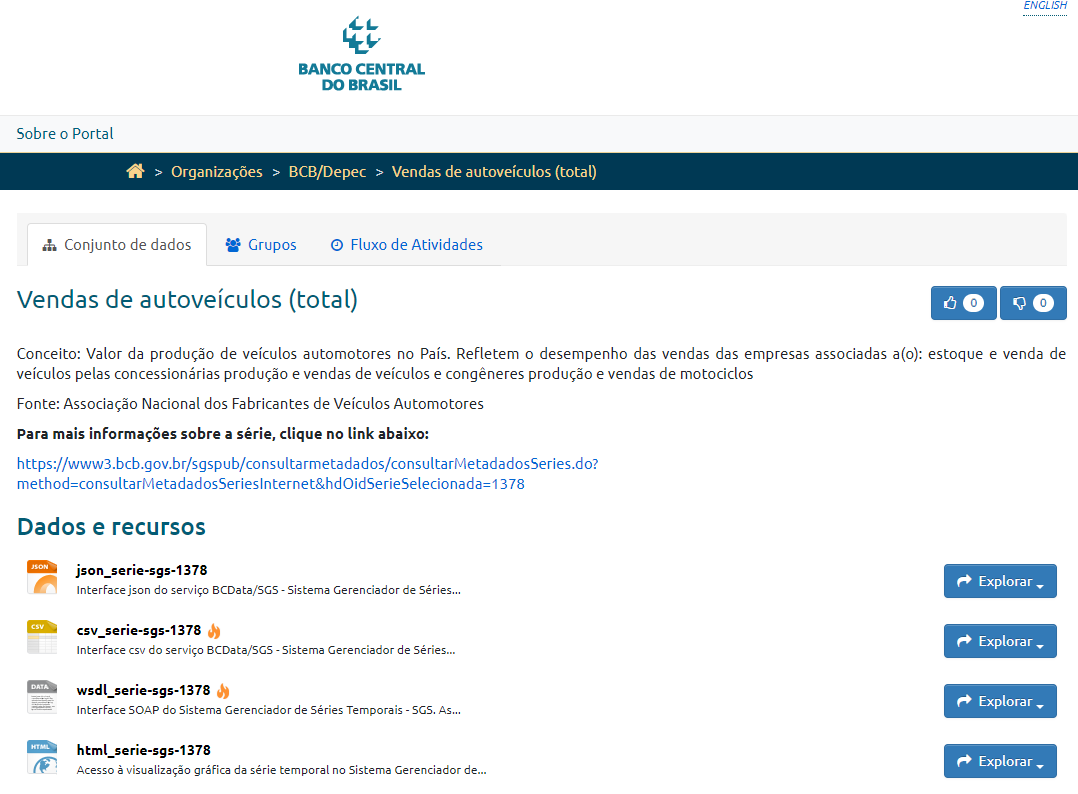

### **Análise Descritiva**

In [ ]:
vendas_carros = pd.read_csv('bcdata.sgs.1378.csv', sep=';', encoding='utf-8')

In [ ]:
print('Quantidade de linhas e colunas:', vendas_carros.shape)

Quantidade de linhas e colunas: (513, 2)


In [ ]:
vendas_carros.head(-5)

,data,valor
0,01/01/1981,87939
1,01/02/1981,65251
2,01/03/1981,64065
3,01/04/1981,69042
4,01/05/1981,62966
...,...,...
503,01/12/2022,218387
504,01/01/2023,155458
505,01/02/2023,148141
506,01/03/2023,216845


In [ ]:
print('Quantidade de dados nulos:', vendas_carros.isna().sum().sum())

Quantidade de dados nulos: 0


In [ ]:
vendas_carros.dtypes

data     object
valor     int64
dtype: object

In [ ]:
# Convertendo a coluna para datetime
vendas_carros['data'] = pd.to_datetime(vendas_carros['data'])
vendas_carros.dtypes

data     datetime64[ns]
valor             int64
dtype: object

<Axes: xlabel='data', ylabel='valor'>

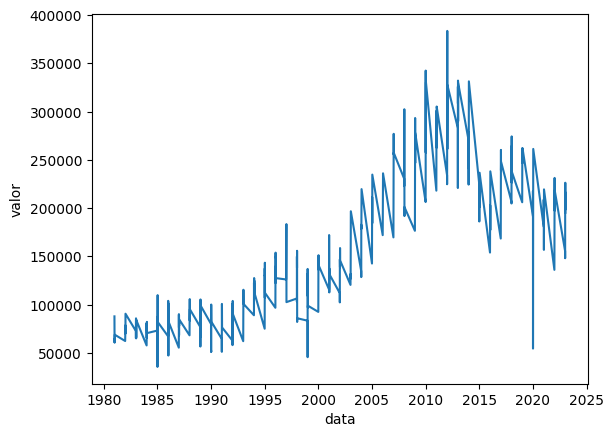

In [ ]:
# Análise Gráfica
sns.lineplot(x='data', y='valor', data=vendas_carros)

Existem alguns style guides que nos auxiliam na visualização dos gráficos. Um deles é o **Urban Institute** , um data visualization style guide. Ele poderá ser encontrado neste [link](https://urbaninstitute.github.io/graphics-styleguide/).

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('pastel') # Mudança para uma paleta mais suave
  sns.set_style('whitegrid') # Fundo claro com grade
  plt.figure(figsize=(12,6)) # Ajuste de tamanho e resolução

# Plotando o gráfico
  ax = sns.lineplot(x=x, y=y, data=dataset)

# Ajustes de título e labels
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)

  plt.show() # Mostrar o gráfico

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc= 'left')
  sns.lineplot(x=x, y=y1, data=dataset)

  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)

  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)

  ax = ax

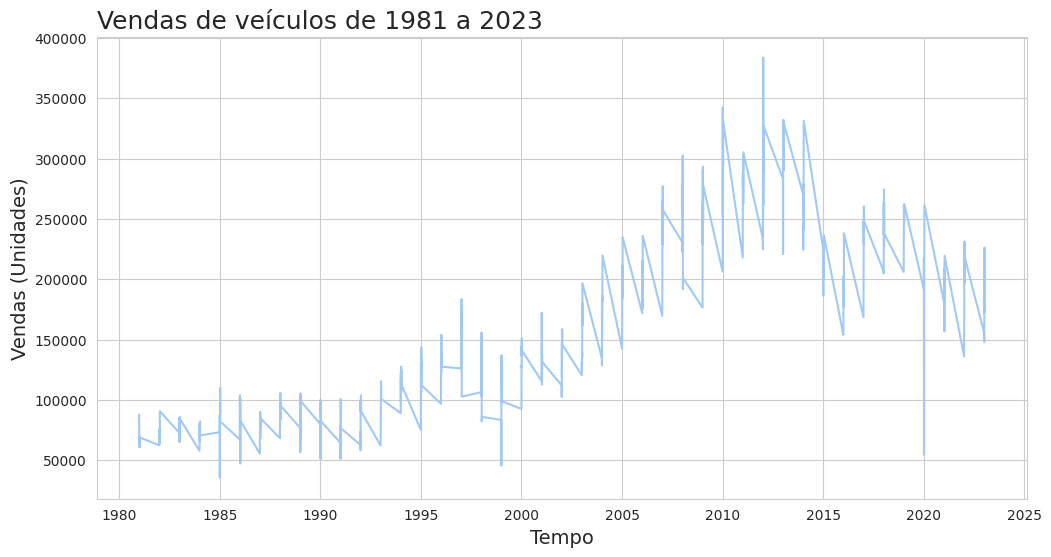

In [ ]:
plotar(titulo='Vendas de veículos de 1981 a 2023', labelx='Tempo',
       labely='Vendas (Unidades)', x='data', y='valor', dataset=vendas_carros)

In [ ]:
# Gerando um indicador comparativo de mês a mês.
vendas_carros['comparativo_mensal'] = vendas_carros['valor'].diff()
vendas_carros.head(-5)

,data,valor,comparativo_mensal
0,1981-01-01,87939,NaN
1,1981-01-02,65251,-22688.0
2,1981-01-03,64065,-1186.0
3,1981-01-04,69042,4977.0
4,1981-01-05,62966,-6076.0
...,...,...,...
503,2022-01-12,218387,941.0
504,2023-01-01,155458,-62929.0
505,2023-01-02,148141,-7317.0
506,2023-01-03,216845,68704.0


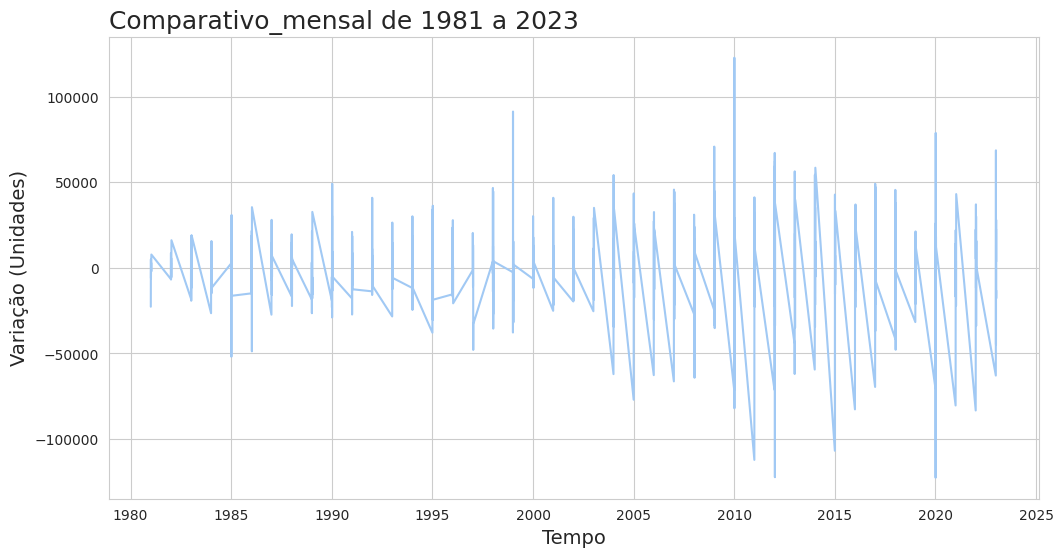

In [ ]:
plotar(titulo='Comparativo_mensal de 1981 a 2023', labelx='Tempo',
       labely='Variação (Unidades)', x='data', y='comparativo_mensal', dataset=vendas_carros)


In [ ]:
# Gerando um indicador comparativo de mês a mês.
vendas_carros['cres-descres'] = vendas_carros['comparativo_mensal'].diff()
vendas_carros.head(-5)

,data,valor,comparativo_mensal,cres-descres
0,1981-01-01,87939,NaN,NaN
1,1981-01-02,65251,-22688.0,NaN
2,1981-01-03,64065,-1186.0,21502.0
3,1981-01-04,69042,4977.0,6163.0
4,1981-01-05,62966,-6076.0,-11053.0
...,...,...,...,...
503,2022-01-12,218387,941.0,-14874.0
504,2023-01-01,155458,-62929.0,-63870.0
505,2023-01-02,148141,-7317.0,55612.0
506,2023-01-03,216845,68704.0,76021.0


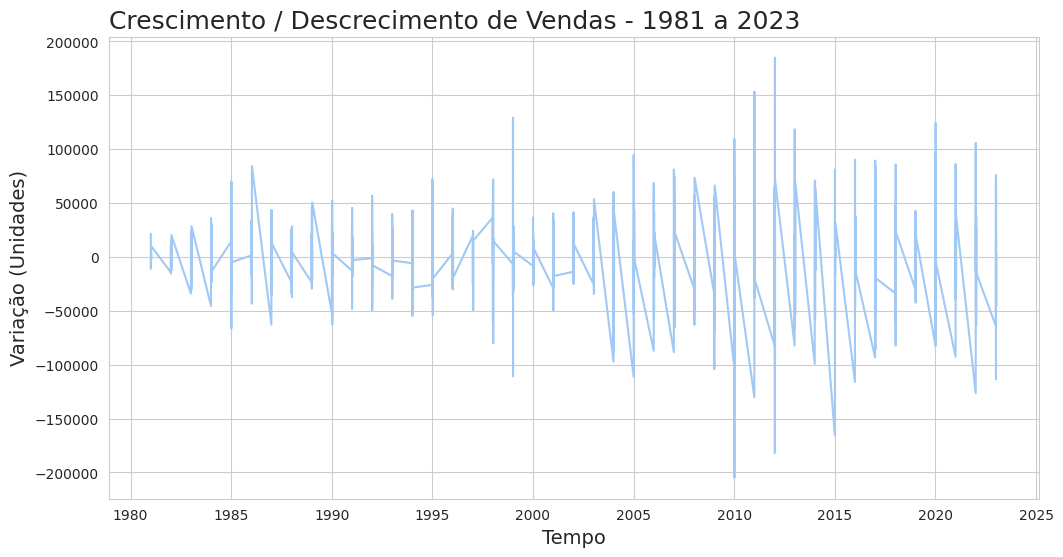

In [ ]:
plotar(titulo='Crescimento / Descrecimento de Vendas - 1981 a 2023', labelx='Tempo',
       labely='Variação (Unidades)', x='data', y='cres-descres', dataset=vendas_carros)

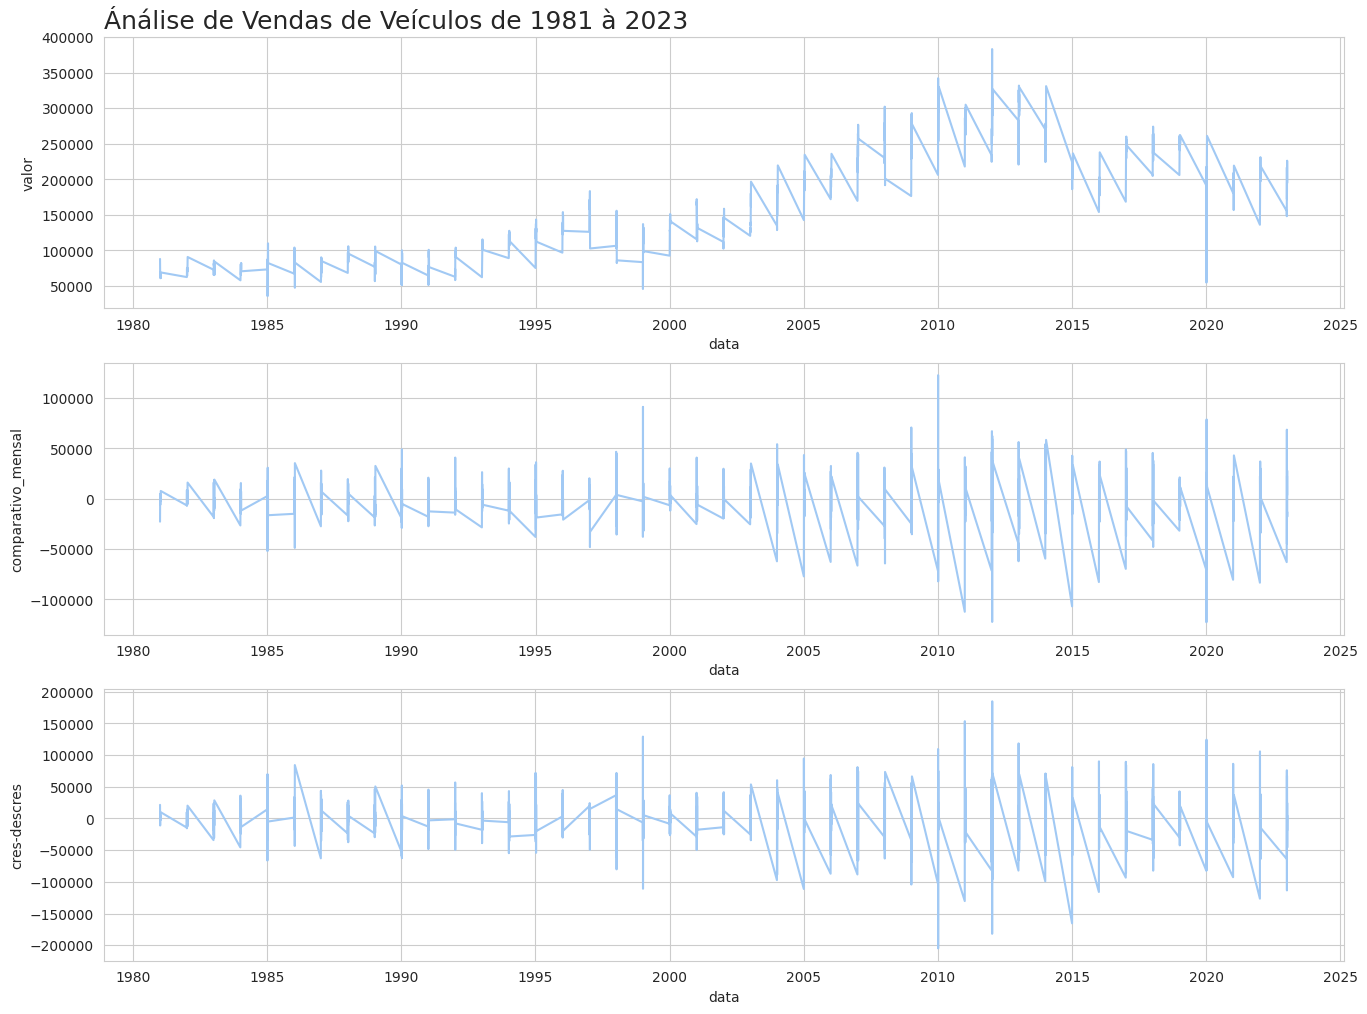

In [ ]:
plot_comparacao('data', 'valor', 'comparativo_mensal', 'cres-descres',
                vendas_carros, 'Ánálise de Vendas de Veículos de 1981 à 2023')

---
**O que é Autocorrelação?**

- **Autocorrelação**, também conhecida como correlação serial, é a correlação de uma sinal com uma cópia atrasada de si mesmo.
- É utilizada para encontrar padrões repetitivos dentro de uma série temporal, como determinar a presença de uma periodicidade ou a utilização como uma ferramenta para encontrar a ideia de "memória" em uma série temporal.

**Interpretação do Gráfico:**

1. **Declínio Inicial Rápido:** A autocorrelação começa em 1 (quando o lag é 0, pois é a correlação da série com ela mesma) e declina rapidamente à medida que o lag aumenta. Isso sugere que os valores são altamente correlacionados com seus valores imediatamente anteriores, mas essa correlação diminui rapidamente à medida que você se afasta no tempo.

2. **Linhas de Confiança:** As linhas horizontais tracejadas representam os limites de confiança, que são calculados para determinar se as correlações são estatisticamente significativas. Se os picos de autocorrelação ultrapassam essas linhas, isso indica que as correlações para esses lags específicos são significativas.

3. **Valores de Autocorrelação Próximos de Zero:** Após o declínio inicial, os valores de autocorrelação flutuam em torno de zero, o que pode indicar que não há uma correlação significativa entre os valores da série temporal e seus valores passados, após os primeiros lags. Isso pode sugerir que não há uma tendência ou sazonalidade forte na série após o período inicial.

4. **Oscilações:** As oscilações em torno da linha zero, principalmente aquelas que não ultrapassam as linhas de confiança, sugerem que qualquer correlação percebida para lags maiores é provavelmente devido ao acaso e não a uma estrutura sazonal ou de tendência na série temporal.

5. **Ausência de Padrão Cíclico ou Sazonal:** Não parece haver um padrão cíclico claro ou repetições regulares de picos significativos, o que seria indicativo de sazonalidade.

Em resumo, a interpretação direta deste gráfico é que os valores são mais fortemente correlacionados com seus valores mais recentes e essa relação diminui rapidamente com o tempo. Depois disso, não há evidências fortes de autocorrelações que seriam significativas em termos de contribuir para um modelo de previsão, como em um modelo ARIMA, por exemplo. Isso pode ser útil para determinar que a memória de longo prazo da série temporal não é substancial, e portanto, modelos de previsão podem não precisar considerar lags muito longos.


---
No contexto de séries temporais, ACF significa Função de Autocorrelação. É uma ferramenta estatística usada para medir a correlação entre diferentes pontos em uma série temporal em função do tempo, ou mais tecnicamente, do número de períodos (lags) entre as comparações.

A ACF é calculada para vários lags e pode ajudar a identificar:

- **Dependências Temporais**: Se e como um valor numa série temporal é relacionado a valores anteriores.
- **Estacionariedade**: Se a série temporal tem propriedades estatísticas que são constantes ao longo do tempo. Uma série estacionária terá valores de ACF que diminuem rapidamente para zero.
- **Sazonalidade**: Padrões repetitivos ou ciclos na série temporal podem ser identificados por picos em lags específicos na ACF.
- **Ordem de Modelos AR**: Em modelos autoregressivos (AR), a ACF pode ajudar a determinar a ordem apropriada do modelo, que é o número de lags passados a considerar na modelagem.

A função de autocorrelação é um dos primeiros passos na análise de séries temporais e na construção de modelos preditivos, como ARIMA (Autoregressive Integrated Moving Average), que utilizam dependências temporais nos dados.

---

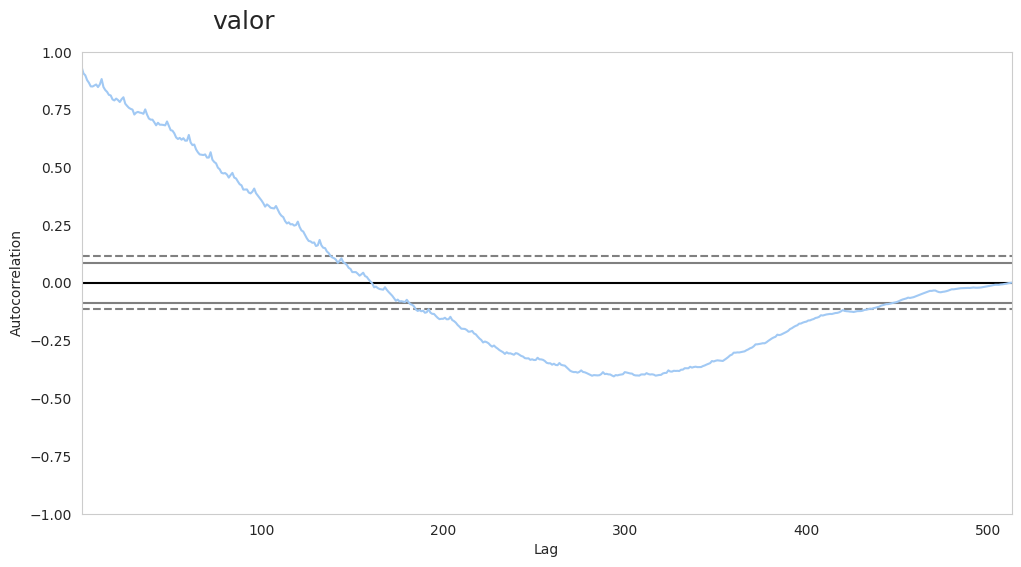

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('valor', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(vendas_carros['valor'])
ax=ax

1. **Eixo Y (Autocorrelação)**: Os valores de autocorrelação variam de -1 a +1. Um valor de 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica nenhuma correlação.

2. **Eixo X (Lag)**: Cada ponto no eixo x representa um lag diferente. Por exemplo, um lag de 1 compara a observação no tempo $ t $ com a observação no tempo $ t-1 $, um lag de 2 compara $ t $ com $ t-2 $, e assim por diante.

3. **Decaimento da Autocorrelação**: No gráfico, a autocorrelação começa em 1 quando o lag é 0 (como sempre será, pois é a correlação da série com ela mesma), e diminui à medida que o lag aumenta. Este padrão de decaimento sugere que as observações estão correlacionadas em lags curtos, mas essa correlação enfraquece à medida que o intervalo de tempo entre as observações aumenta.

4. **Linhas de Significância**: As linhas horizontais tracejadas representam os limites de significância estatística. Se a linha de autocorrelação cruza essas linhas, sugere-se que as correlações para esses lags específicos são estatisticamente significativas e não zero.

5. **Autocorrelações Significativas**: Neste gráfico, as autocorrelações dentro dos lags iniciais estão acima do limite superior de significância, o que implica que há uma correlação significativa entre observações nesses lags iniciais.

6. **Interpretação Estatística**: A autocorrelação significativa nos primeiros lags pode indicar uma inércia ou momentum na série temporal, onde os valores passados têm uma influência forte nos valores futuros. Este é um sinal de que modelos como AR (AutoRegressive) podem ser apropriados para a série.

7. **Tendência e Sazonalidade**: Se houvesse picos periódicos na ACF, isso poderia indicar sazonalidade na série temporal. No entanto, esse gráfico não parece mostrar padrões sazonais claros, pois não há picos em intervalos regulares de lags.

8. **Não Estacionariedade**: O fato de que a linha de autocorrelação não se aproxima rapidamente de zero sugere que a série temporal pode não ser estacionária e pode ter uma tendência ou raiz unitária.

Em resumo, este gráfico sugere que há autocorrelações significativas em lags curtos e que a série pode não ser estacionária. Isso pode informar a escolha de métodos de modelagem e a necessidade de transformações adicionais nos dados (como a diferenciação) para alcançar a estacionariedade antes da modelagem.

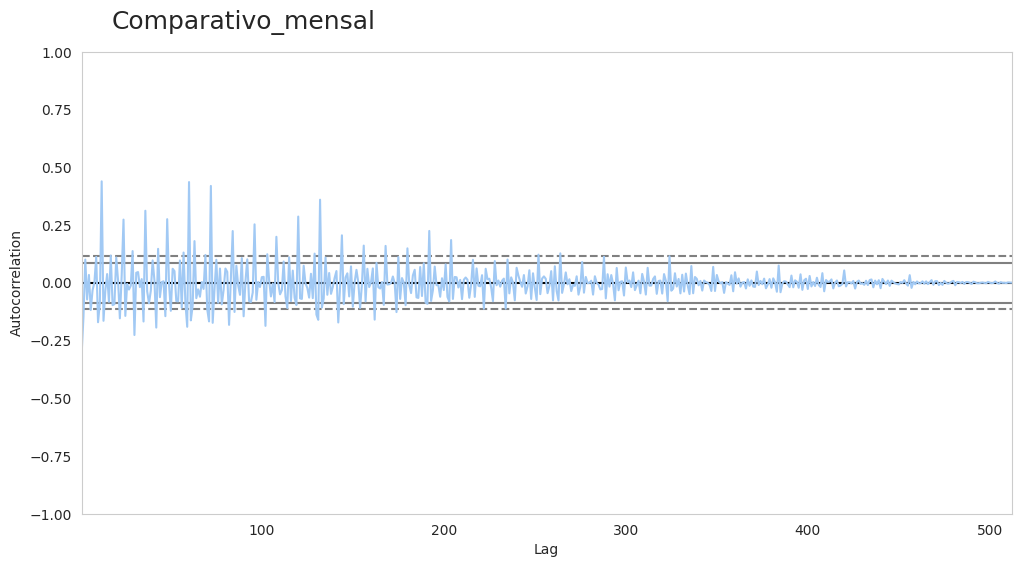

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Comparativo_mensal', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(vendas_carros['comparativo_mensal'][1:])
ax=ax

Este gráfico de autocorrelação apresenta uma série temporal com uma característica diferente da anterior:

1. **Autocorrelações Aproximadamente Zero**: A maioria das autocorrelações para vários lags parece ser muito próxima de zero, o que significa que **não há uma correlação clara entre os valores em diferentes lags**.

2. **Linhas de Significância**: As linhas horizontais tracejadas representam os limites dentro dos quais os valores de autocorrelação são considerados não significativamente diferentes de zero. Neste gráfico, a vasta maioria das autocorrelações está dentro destes limites, **o que sugere que qualquer correlação observada é provavelmente devida ao acaso**.

3. **Spikes Esporádicos**: Existem alguns picos que ultrapassam os limites de significância, mas eles não apresentam **um padrão regular ou repetitivo que sugira sazonalidade**.

4. **Estacionariedade Potencial**: A ausência de uma tendência clara ou de padrões sazonais e o fato de que as autocorrelações estão em grande parte dentro das bandas de confiança sugerem que a série temporal pode ser estacionária.

5. **Ruído Branco**: Se a série temporal for verdadeiramente aleatória, ou seja, cada valor é independente dos valores anteriores (um processo conhecido como ruído branco), a ACF terá um aspecto semelhante a este, com autocorrelações dentro dos limites de confiança.

6. **Interpretação Prática**: A falta de autocorrelações significativas indica que os valores passados da série temporal não fornecem informações úteis para prever os valores futuros. Em termos de modelagem, isso pode significar que modelos autorregressivos simples podem não ser adequados.

7. **Investigação Adicional**: Mesmo com a ACF mostrando poucas autocorrelações significativas, é importante realizar testes adicionais para estacionariedade, como o teste Dickey-Fuller aumentado, e examinar outras funções como a Função de Autocorrelação Parcial (PACF) para uma análise mais completa.

Em resumo, este gráfico sugere que a série temporal analisada pode não ter uma estrutura temporal clara que possa ser explorada para modelagem preditiva com base em valores passados.

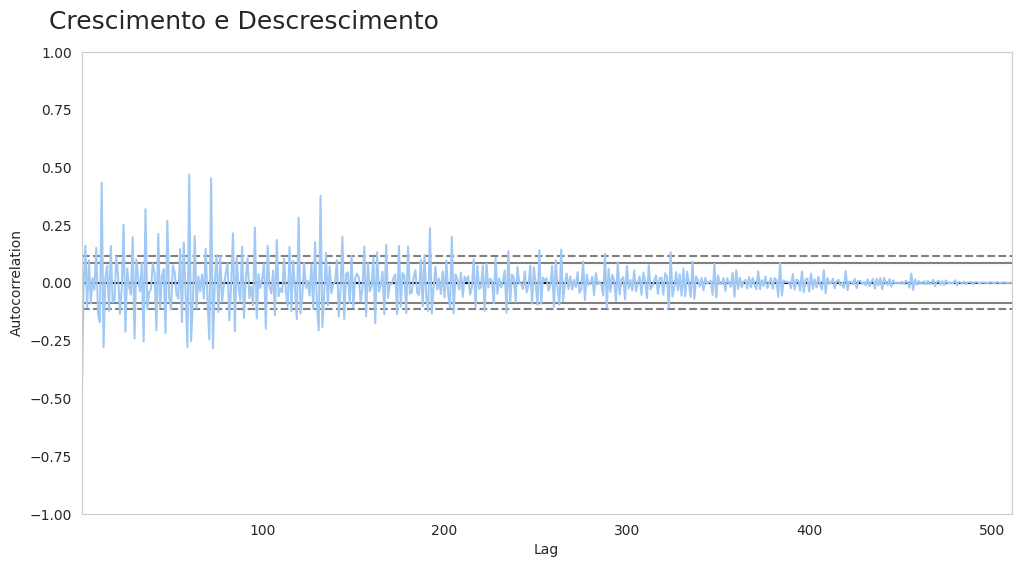

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Crescimento e Descrescimento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(vendas_carros['cres-descres'][2:])
ax=ax

1. **Autocorrelações dentro do Intervalo de Confiança:** A maioria das autocorrelações para diferentes lags parece estar dentro das linhas de confiança, o que indica que a maioria das autocorrelações observadas pode não ser estatisticamente significativa e poderia ser resultado de flutuações aleatórias.

2. **Spikes Esporádicos:** Existem alguns picos que ultrapassam as linhas de confiança, indicando possíveis correlações significativas em lags específicos. No entanto, esses picos parecem ser esporádicos e não apresentam um padrão regular.

3. **Nenhuma Tendência ou Sazonalidade Clara:** Assim como no gráfico anterior, não há um padrão claro e repetitivo de picos que sugeriria uma tendência ou sazonalidade forte. Se houvesse sazonalidade, esperaríamos ver picos em intervalos regulares.

4. **Volatilidade dos Dados:** As variações abruptas nos picos (tanto positivos quanto negativos) sugerem que a série temporal pode ser volátil, com variações que não são consistentemente explicadas por seus valores anteriores.

5. **Análise mais Profunda Necessária:** Para lags onde há picos significativos, seria útil investigar mais a fundo para entender se esses são fenômenos isolados ou se há alguma informação adicional que poderia explicar essas autocorrelações.

Com base nesta visualização, a série temporal parece ser em grande parte ruidosa, com poucas correlações significativas entre os valores atuais e seus valores anteriores, sugerindo que um modelo de previsão simples, que não leva em conta muitos lags anteriores, poderia ser adequado. No entanto, para uma modelagem mais precisa, seria importante investigar mais a fundo os picos significativos para entender suas causas e se eles representam alguma dinâmica subjacente que poderia ser modelada.

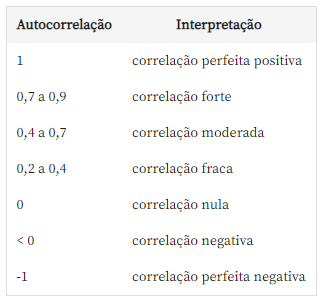

---
As linhas horizontais tracejadas

As linhas horizontais tracejadas em um gráfico de autocorrelação representam os limites de confiança para a autocorrelação em cada defasagem (lag). Se a autocorrelação em um determinado lag está fora desses limites, pode-se considerar que há uma autocorrelação estatisticamente significativa naquele lag específico.

A forma como essas linhas de confiança são calculadas depende da quantidade de dados e do nível de confiança desejado (tipicamente 95% ou 99%). Para uma série temporal, a fórmula padrão para o limite de confiança ao nível de 95% é aproximadamente:

$ \pm \frac{1.96}{\sqrt{N}} $

Onde:

- $ 1.96 $ é o valor z para um nível de confiança de 95% (aproximadamente 1.96 desvios padrão de distância da média em uma distribuição normal padrão).
- $ N $ é o número total de observações na série temporal.

Assim, se você tem uma série temporal com 100 observações, os limites de confiança seriam $ \pm \frac{1.96}{\sqrt{100}} = \pm 0.196 $. Qualquer autocorrelação além de $ \pm 0.196 $ para um determinado lag seria considerada estatisticamente significativa.

É importante notar que à medida que o número de observações aumenta, o intervalo de confiança se estreita, o que significa que você pode detectar autocorrelações menores como significativas.

As bibliotecas de análise de dados, como o `statsmodels` em Python, geralmente calculam e traçam essas linhas de confiança automaticamente quando você gera um gráfico de autocorrelação.

## **Analisando inscrições em Newsletter**

A empresa DiRWA possui uma Newsletter mensal sobre descontos e promoções. Depois de dois anos da criação dessa Newsletter, foi solicitada uma análise para descobrir o comportamento do número de assinantes dela, se tem aumentado ou diminuído.

### **Análise Descritiva**

In [ ]:
assinantes = pd.read_csv('newsletter_dirwa.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', assinantes.shape)

Quantidade de linhas e colunas: (24, 2)


In [ ]:
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de dados nulos 0


In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


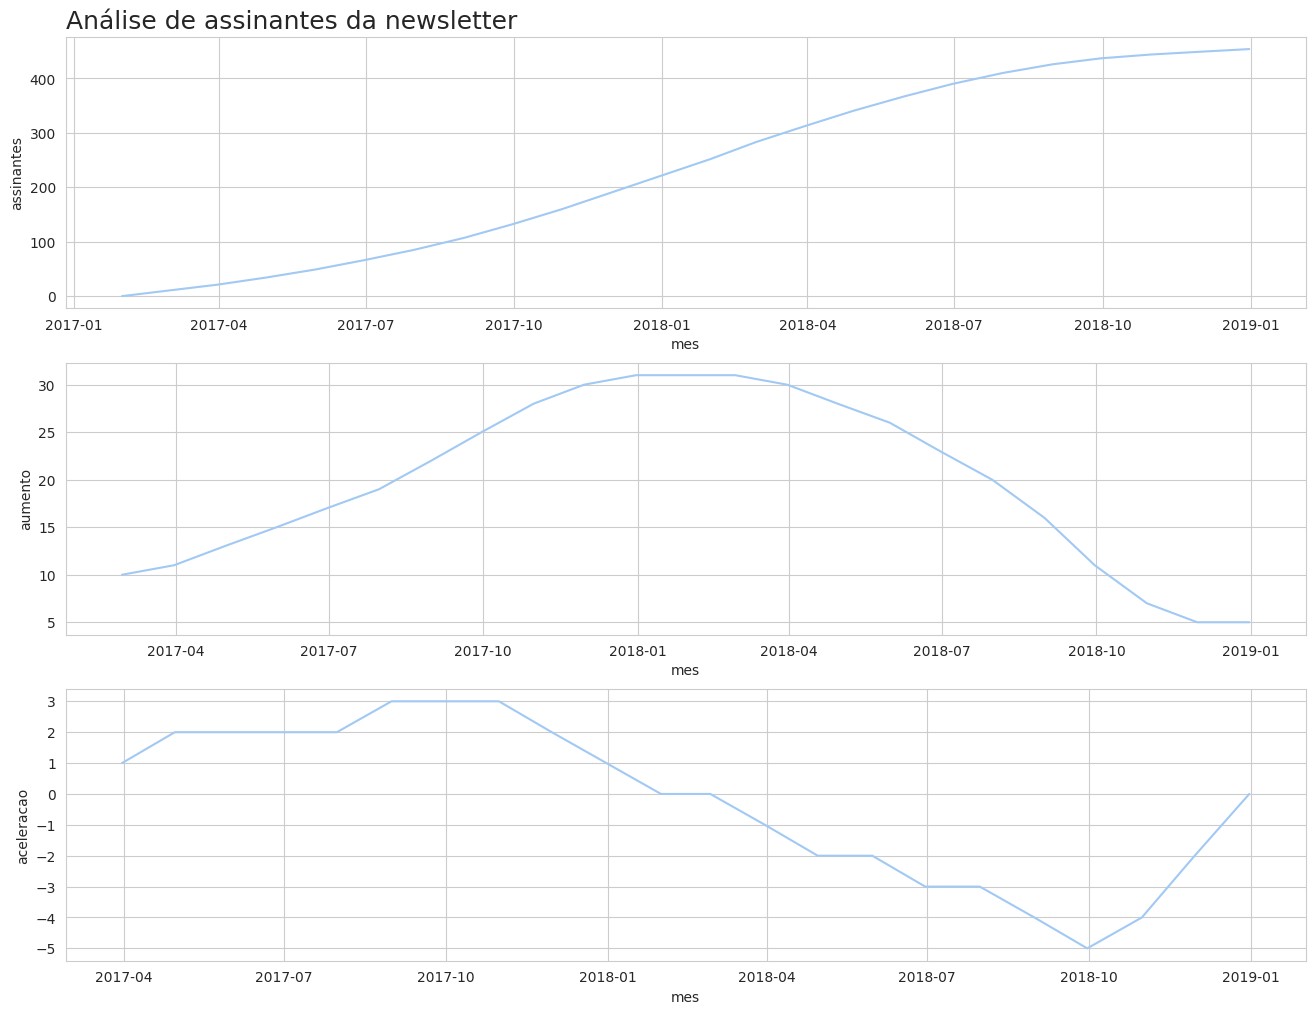

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

1. Observa-se uma tendência de crescimento no primeiro gráfico com uma estabilização no número de inscrições;

2. Nota-se o ponto de máximo de inscrições entre 2018-01 e 2018-04. Após, esse número começou a cair;

3. A aceleração começa positiva, entretanto, se torna negativa . No mês 10 de 2018, chega quase a -5 antes de se recuperar um pouco.

Com esses gráficos, veremos que decompondo as inscrições poderemos encontrar casos muito interessantes. Se tivéssemos só o gráfico da análise de assinantes, acharíamos que a tendência seria ao crescimento expressivo.

Fazendo a decomposição, vemos que de fato houve um crescimento, mas depois o aumento do número de assinantes cai de forma notória. Também ocorre desaceleração dos assinantes da newsletter num determinado momento, havendo aceleração negativa, ainda que ela tenha se iniciado positiva.




## **Analisando sazonalidade**

Existe uma empresa grande no ramo alimentício que nos solicitou uma análise a respeito de chocolates, a DiRWA Chocolates.

A empresa observou que em um determinado período do ano a demanta torna-se demasiadamente alta. Por mais que a produção opere na capacidade máxima, não tem sido o suficiente para suprir os pedidos. Tentaremos descobrir o que está acontecendo com as vendas da DiRWA Chocolates.

### **Análise Descritiva**

In [ ]:
chocolate = pd.read_csv('choco_dirwa.csv')
chocolate.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolate.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', chocolate.shape)

Quantidade de linhas e colunas: (24, 2)


In [ ]:
print('Quantidade de dados nulos', chocolate.isna().sum().sum())

Quantidade de dados nulos 0


In [ ]:
chocolate['mes'] = pd.to_datetime(chocolate['mes'])
chocolate.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
chocolate['aumento']= chocolate ['vendas'].diff()
chocolate['aceleracao']= chocolate ['aumento'].diff()
chocolate.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


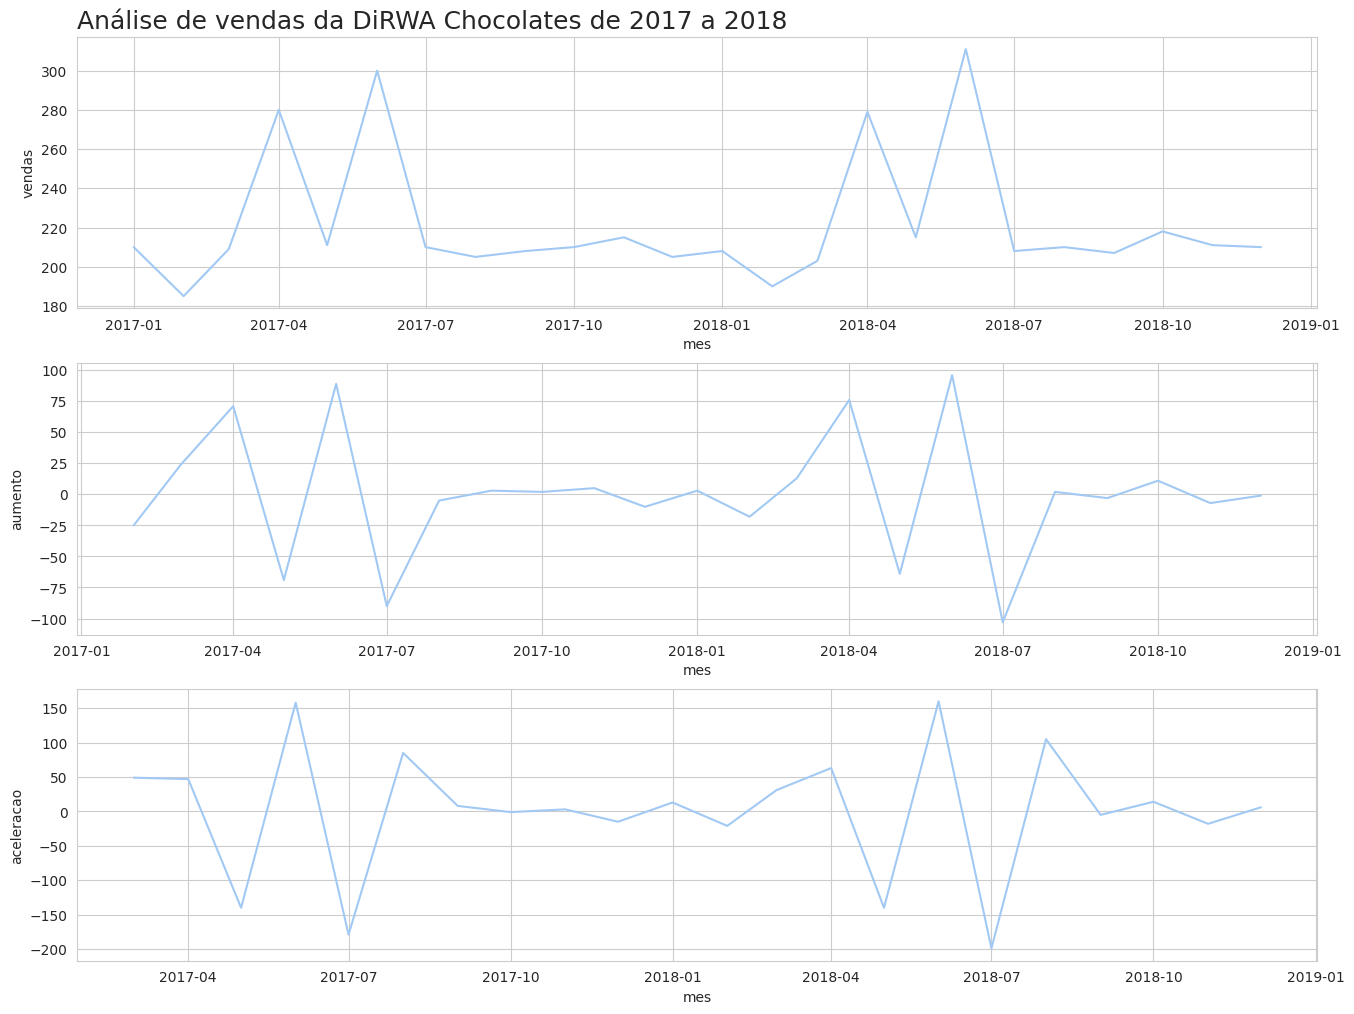

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolate, 'Análise de vendas da DiRWA Chocolates de 2017 a 2018')

1. Começando com a análise de vendas, o gráfico mostra uma queda das vendas no mês de Janeiro de 2017. Há um crescimento grande especificamente no mês 4 e uma queda posterior. Depois, há também um crescimento aproximadamente no mês 7, Junho.

2. De Julho de 2017 ao mês de Janeiro de 2018 ocorre novamente uma queda, e se repete o crescimento no mês 4 de 2018 e o próximo ao mês 6. Isto mostra um comportamento chamado sazonalidade.

3. A sazonalidade é um padrão repetitivo dentro de um determinado período fixo de tempo. Neste exemplo, sempre no mês 4 e no 6 a empresa venderá mais chocolate.

4. sse comportamento é muito característico das séries temporais.

5. Agora que já sabemos o que é sazonalidade, pensemos por que esse fenômeno ocorre nesses meses. No mês 4 de todos os anos costuma haver a data da Páscoa e em Junho, o Dia dos Namorados. As vendas de chocolates da Chocolura, pelo gráfico de vendas, é maior até em Junho do que em Abril.

**Vendas diárias**

In [ ]:
vendas_por_dia = pd. read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

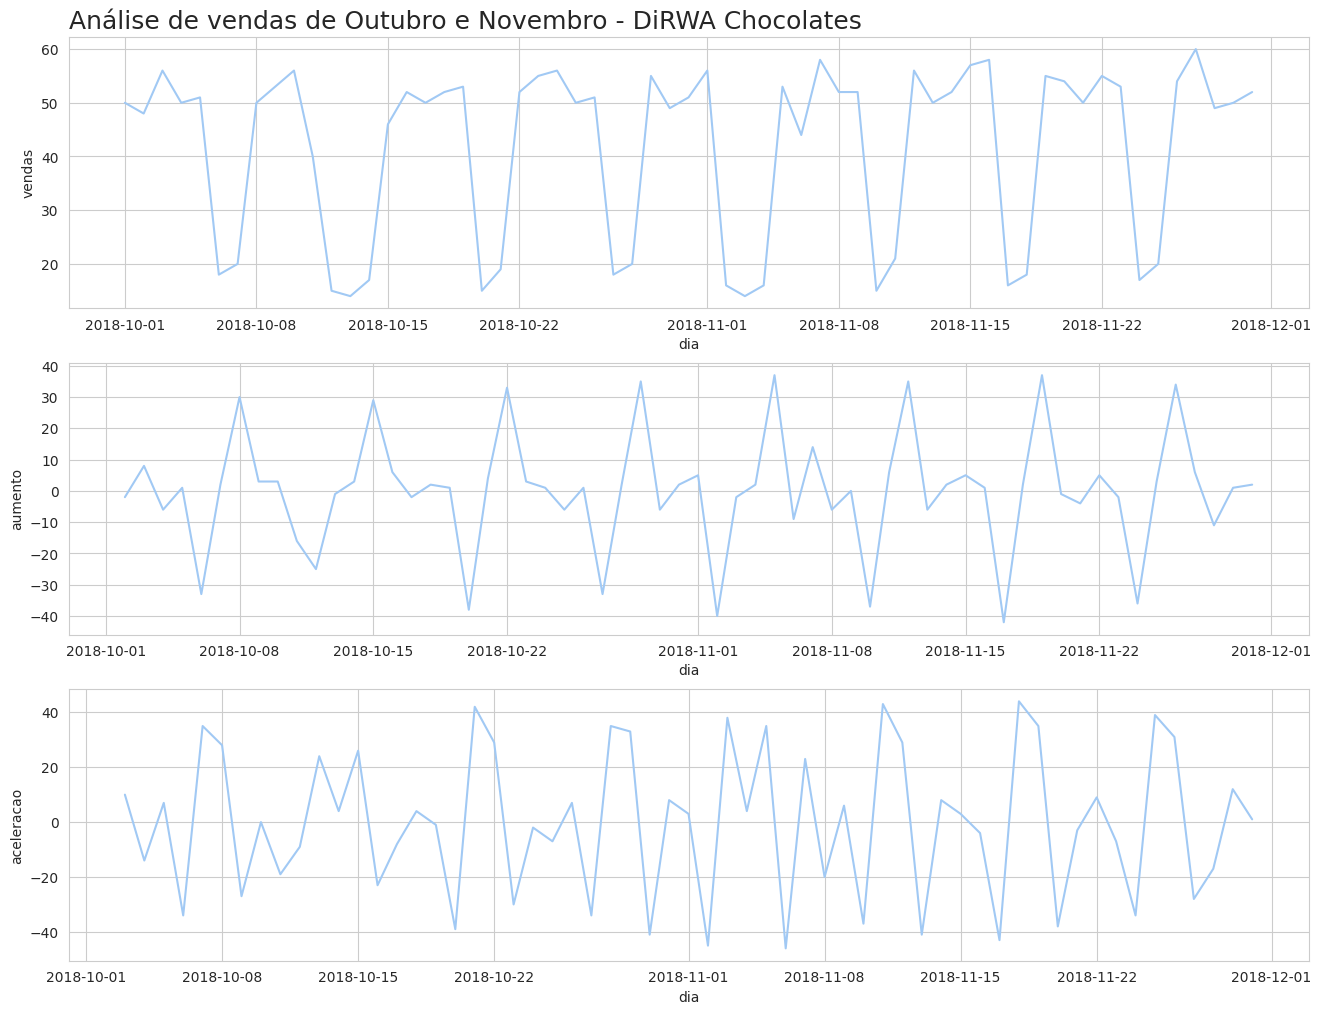

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia,
                'Análise de vendas de Outubro e Novembro - DiRWA Chocolates')

**Analisando a sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

**Agrupando por dias**

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas.head(7)

<ipython-input-48-5027e611f8f8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0


In [ ]:
# Define a ordem correta dos dias da semana
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Transforma a coluna 'dia_da_semana' em uma categoria com a ordem correta
vendas_por_dia['dia_da_semana'] = pd.Categorical(vendas_por_dia['dia_da_semana'], categories=dias, ordered=True)

# Agrupa e calcula a média, agora respeitando a ordem dos dias
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

# Mostra os resultados
vendas_agrupadas.head(7)


<ipython-input-49-cf7dac5a5136>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Monday,52.0,34.0,31.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0
Thursday,51.0,-2.0,-3.0
Friday,45.0,-7.0,-5.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0


Então,podemos concluir analisando a sazonalidade que as quedas representadas no gráfico serão referentes aos finais-de-semana. Por alguma regra de negócios da empresa, esses dias, contando com feriados, contaram bastante para a tendência que nosso gráfico apresentará.

**Correlação das vendas diárias**

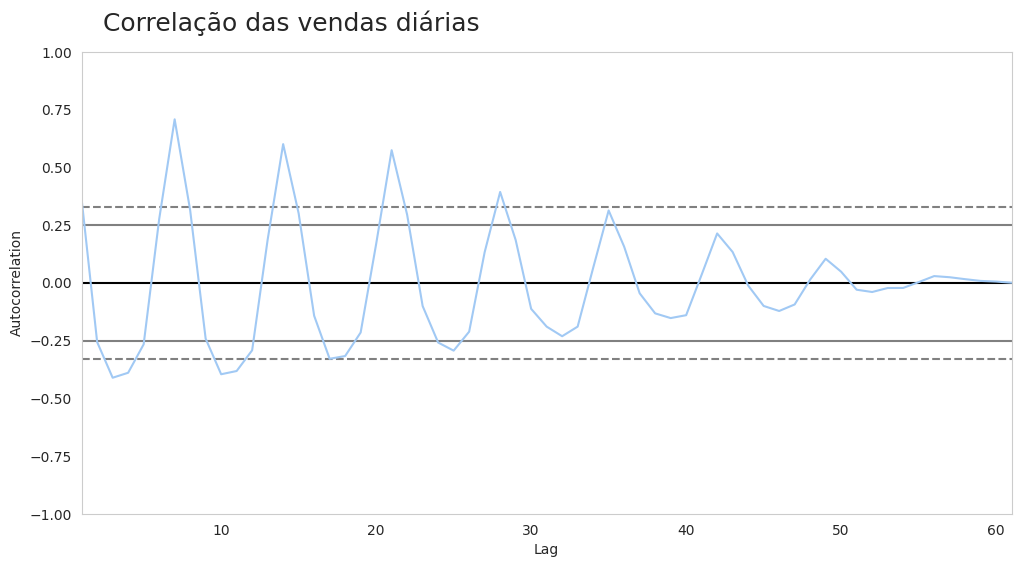

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

Este gráfico de autocorrelação mostra um padrão de picos e vales claramente definidos e repetitivos, o que é indicativo de sazonalidade nos dados de vendas diárias.

1. **Picos de Autocorrelação**: Os picos (valores altos de autocorrelação positiva) em intervalos regulares sugerem que existe um padrão sazonal, onde o comportamento das vendas se repete após um número específico de dias.

2. **Padrão Sazonal**: A sazonalidade parece ser de aproximadamente sete dias, o que é comum para dados de vendas diárias, pois pode refletir um ciclo semanal. Isso é evidenciado pelos picos que ocorrem em intervalos regulares (por exemplo, lags 7, 14, 21, etc.).

3. **Linhas de Significância**: Os picos que ultrapassam as linhas horizontais tracejadas indicam que a autocorrelação para esses lags é estatisticamente significativa. Isso significa que as vendas em um dia específico da semana estão significativamente correlacionadas com as vendas no mesmo dia em semanas subsequentes.

4. **Vales Negativos**: Os vales negativos (valores de autocorrelação negativa) podem indicar uma alternância nos padrões de vendas, onde um pico em vendas pode ser seguido por um vale em um intervalo regular.

5. **Modelagem**: Essa informação pode ser muito útil para a modelagem de séries temporais. Um modelo sazonal, como SARIMA (Seasonal Autoregressive Integrated Moving Average), pode ser adequado para capturar esses padrões regulares.

6. **Planejamento Empresarial**: Do ponto de vista do negócio, essa sazonalidade pode ser usada para planejamento de estoque, campanhas de marketing, e alocação de recursos, ajustando-se para a demanda antecipada baseada no dia da semana.

7. **Investigação de Causas**: Para um entendimento mais profundo, seria importante investigar o que causa essa sazonalidade. Pode ser devido a comportamentos de compra dos consumidores, promoções semanais, dias de pagamento, ou outros eventos cíclicos que afetam as vendas.

Em resumo, este gráfico ACF mostra uma forte sazonalidade semanal nas vendas diárias, com correlações significativas que um planejador de negócios ou modelador de séries temporais deveria considerar em suas análises e estratégias.

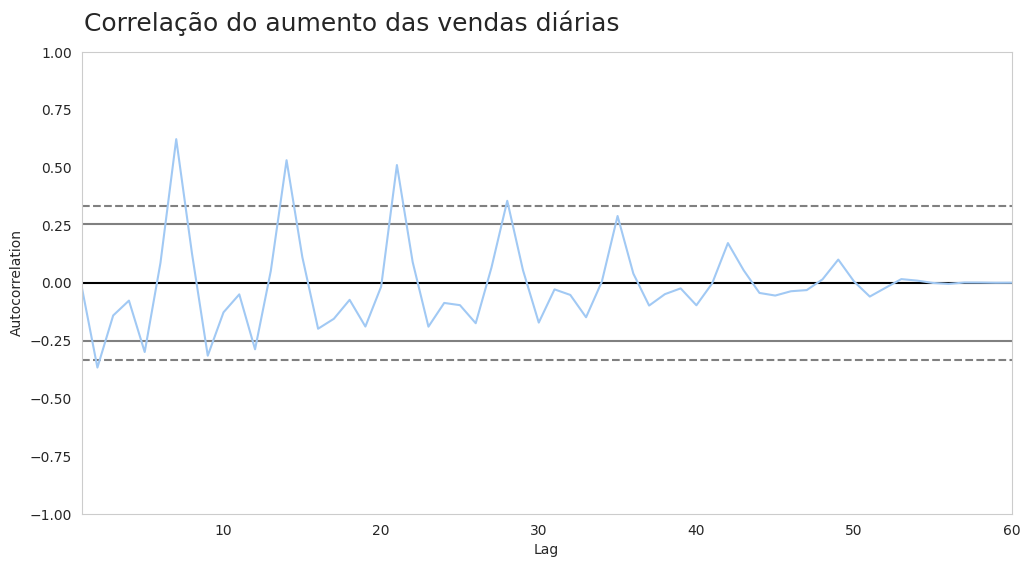

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

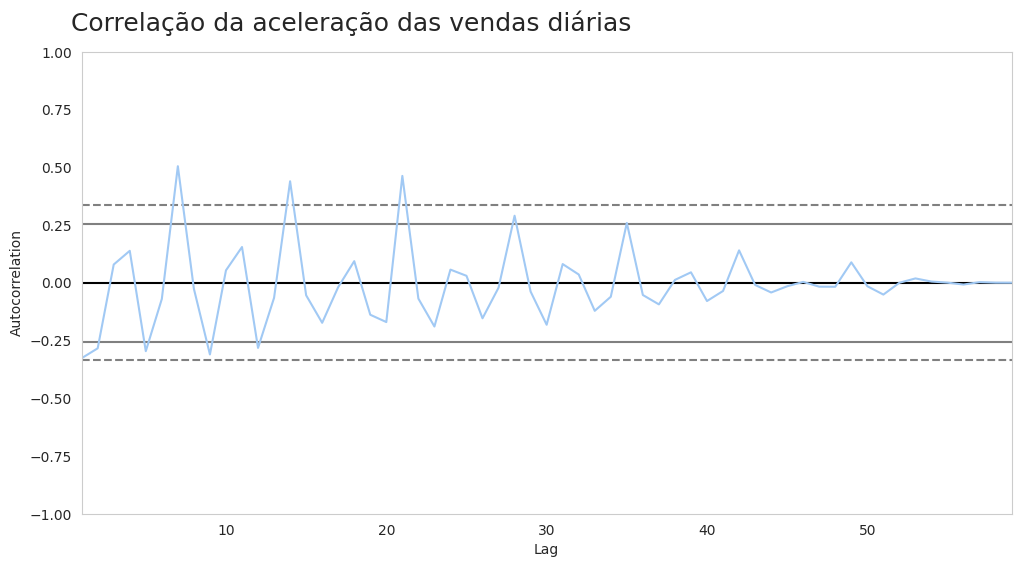

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

Nesse gráficos veremos que também existirá correlação, mas ela será um pouco menor, ainda que influencie. O gráfico ultrapassará positivamente a faixa de significância algumas vezes antes de cair e ficar nulo.

## **Analisando vendas do DiRWA Café - Normalização**

Continuando nosso estudo, agora analisaremos as vendas de nossa cafeteria fictícia muito conhecida no Brasil, a DiRWA Café.

### **Análise Descritiva**

In [ ]:
cafe = pd.read_csv('cafe_dirwa.csv')
cafe.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafe.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafe['mes'] = pd.to_datetime(cafe['mes'])
cafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', cafe.shape)
print('Quantidade de dados nulos:', cafe.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


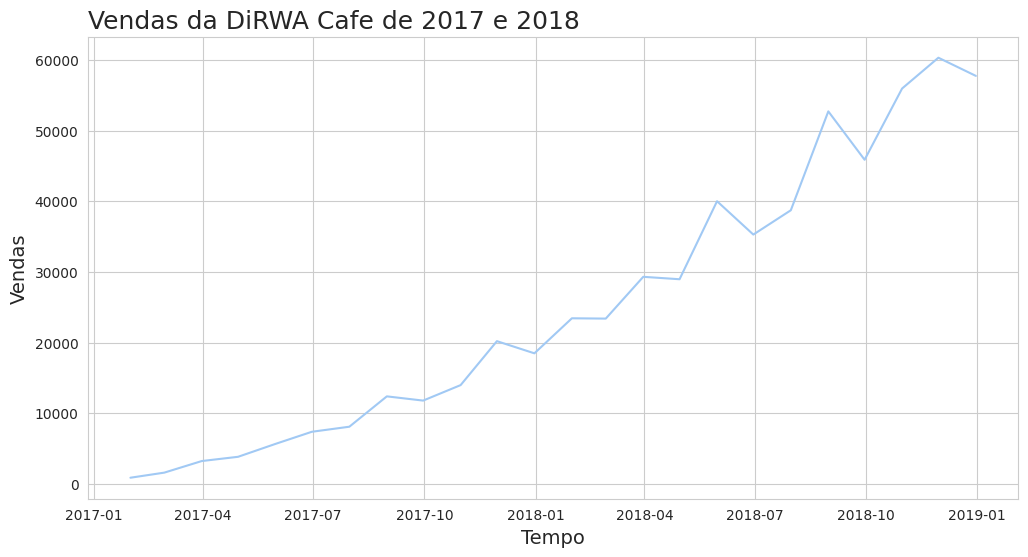

In [ ]:
plotar('Vendas da DiRWA Cafe de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafe)

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafe['vendas_normalizadas']= cafe['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafe.head

<bound method NDFrame.head of           mes  vendas  vendas_normalizadas
0  2017-01-31     880                110.0
1  2017-02-28    1600                200.0
2  2017-03-31    3240                324.0
3  2017-04-30    3840                480.0
4  2017-05-31    5670                630.0
5  2017-06-30    7380                820.0
6  2017-07-31    8096               1012.0
7  2017-08-31   12390               1239.0
8  2017-09-30   11792               1474.0
9  2017-10-31   13984               1748.0
10 2017-11-30   20200               2020.0
11 2017-12-31   18480               2310.0
12 2018-01-31   23436               2604.0
13 2018-02-28   23392               2924.0
14 2018-03-31   29304               3256.0
15 2018-04-30   28960               3620.0
16 2018-05-31   40000               4000.0
17 2018-06-30   35280               4410.0
18 2018-07-31   38720               4840.0
19 2018-08-31   52710               5271.0
20 2018-09-30   45864               5733.0
21 2018-10-31   55944   

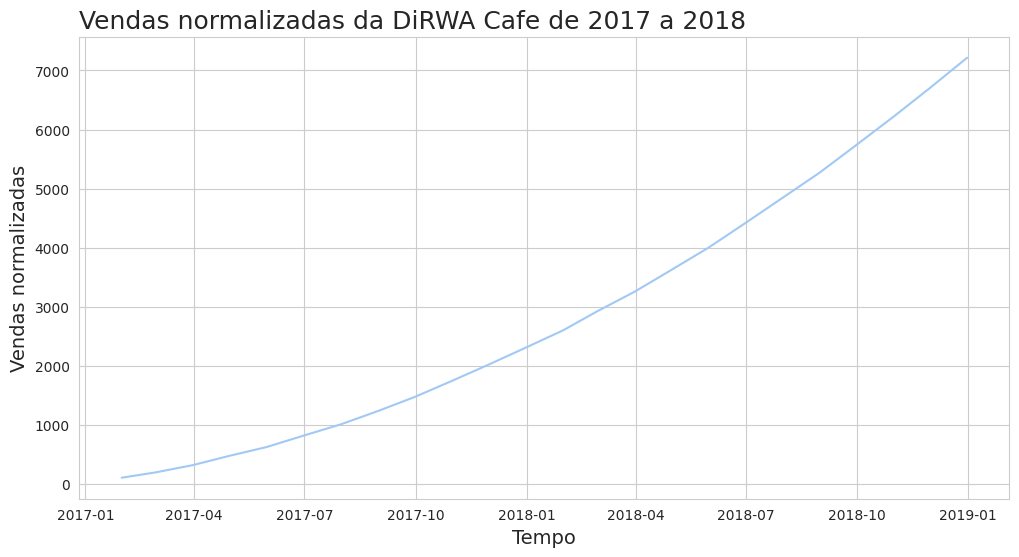

In [ ]:
plotar('Vendas normalizadas da DiRWA Cafe de 2017 a 2018', 'Tempo',
       'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafe)

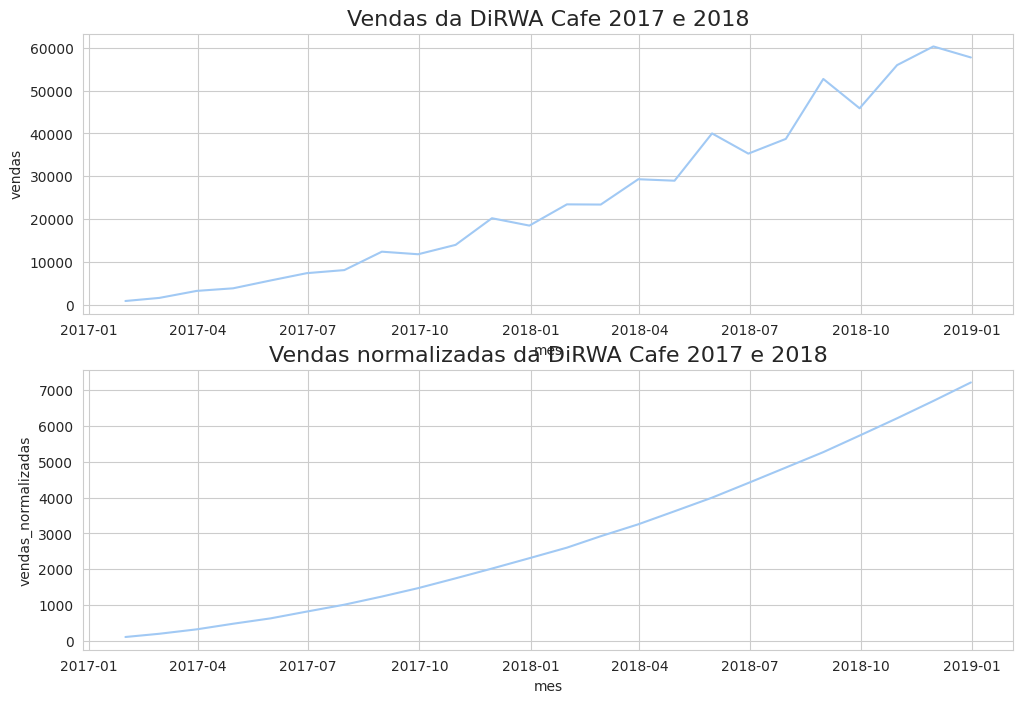

In [ ]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas da DiRWA Cafe 2017 e 2018', fontsize=16)
sns.lineplot(x='mes', y='vendas', data=cafe)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas da DiRWA Cafe 2017 e 2018', fontsize=16)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafe)
ax=ax

**Outro exemplo de normalização: COVID-19 - Média Móvel!**

## **Statsmodels**

Voltando aos Chocolates DiRWA

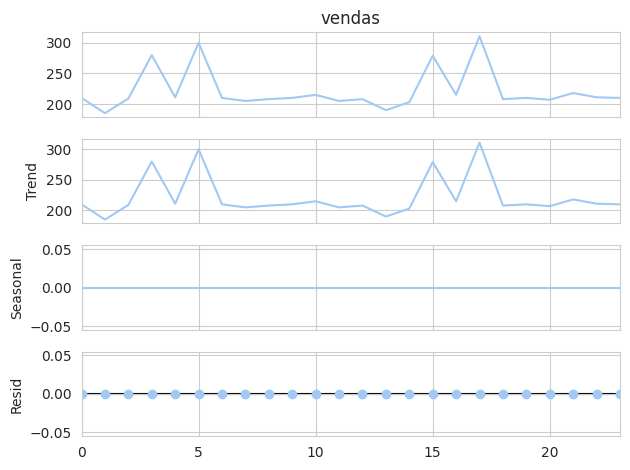

In [ ]:
resultado = seasonal_decompose(chocolate['vendas'],  period=1)
ax = resultado.plot()

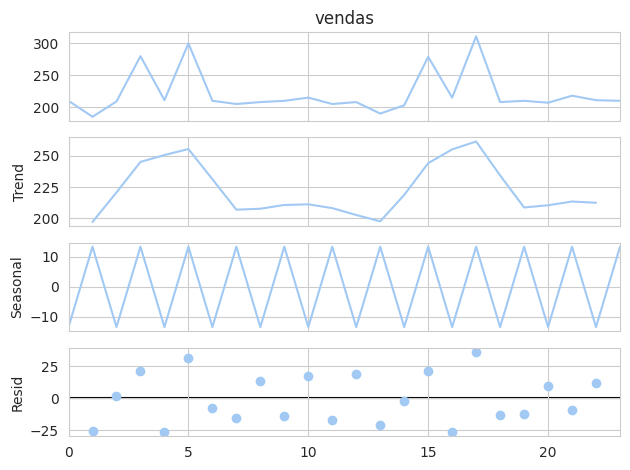

In [ ]:
resultado = seasonal_decompose(chocolate['vendas'],  period=2)
ax = resultado.plot()

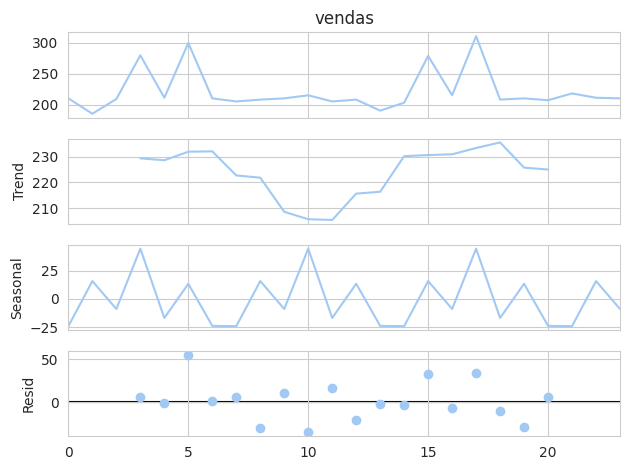

In [ ]:
resultado = seasonal_decompose(chocolate['vendas'],  period=7)
ax = resultado.plot()

A função `seasonal_decompose` é uma função do pacote `statsmodels` em Python, que é usada para decompor uma série temporal em suas componentes fundamentais. Acima, o objetivo é de decompor a série temporal das 'vendas' do DataFrame `chocolate` em suas componentes sazonal, tendência e resíduo.

- `seasonal_decompose`: É o nome da função que realiza a decomposição da série temporal.
  
- `chocolate['vendas']`: Especifica a coluna 'vendas' do DataFrame `chocolate`, que contém os dados da série temporal que você deseja decompor.

- `period=1`: O parâmetro `period` define a periodicidade dos dados. Neste caso, um valor de `1` sugere que não há sazonalidade específica ou que os dados são considerados para ter uma sazonalidade de um período, o que geralmente não é muito comum. Normalmente, você definiria `period` como o número de observações por ciclo sazonal. Por exemplo, se suas vendas têm um padrão sazonal que se repete a cada ano e os dados são mensais, você usaria `period=12`. Se os dados são diários e você está procurando por sazonalidade semanal, usaria `period=7`.

A função `seasonal_decompose` retorna um objeto com várias atribuições úteis, como:

- `resultado.trend`: A componente de tendência da série temporal.
- `resultado.seasonal`: A componente sazonal da série temporal.
- `resultado.resid`: A componente residual (ou erro) da série temporal, que é o que resta depois de remover a tendência e a sazonalidade.

Essas componentes podem ser visualizadas ou analisadas separadamente para entender melhor os padrões e estruturas subjacentes na série temporal. A decomposição é uma ferramenta útil para análise preliminar de dados temporais, ajudando a identificar e modelar qualquer sazonalidade ou tendência nos dados.

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia,
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


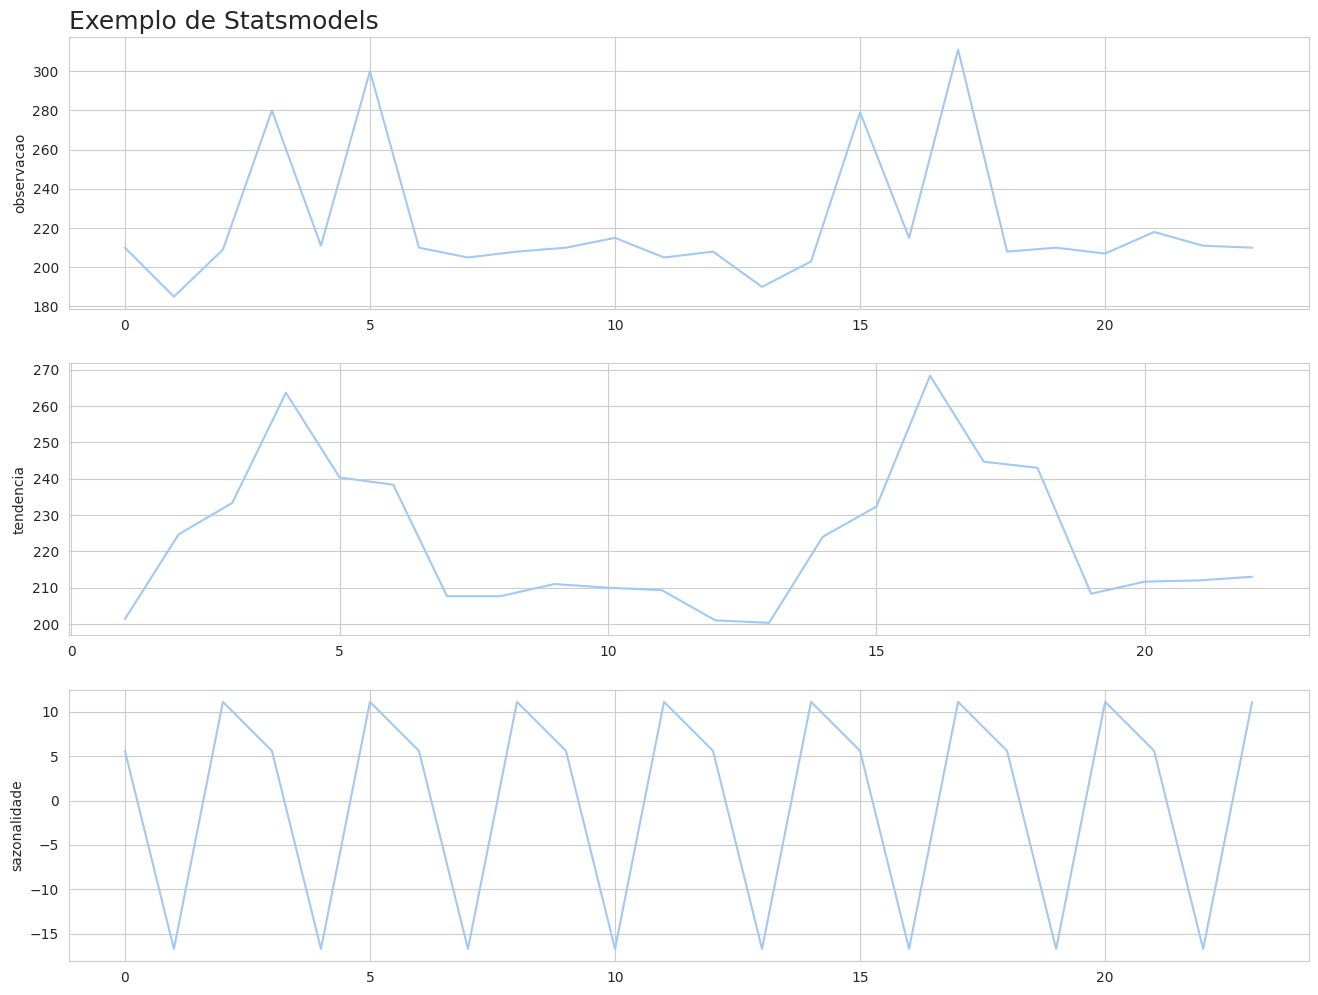

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

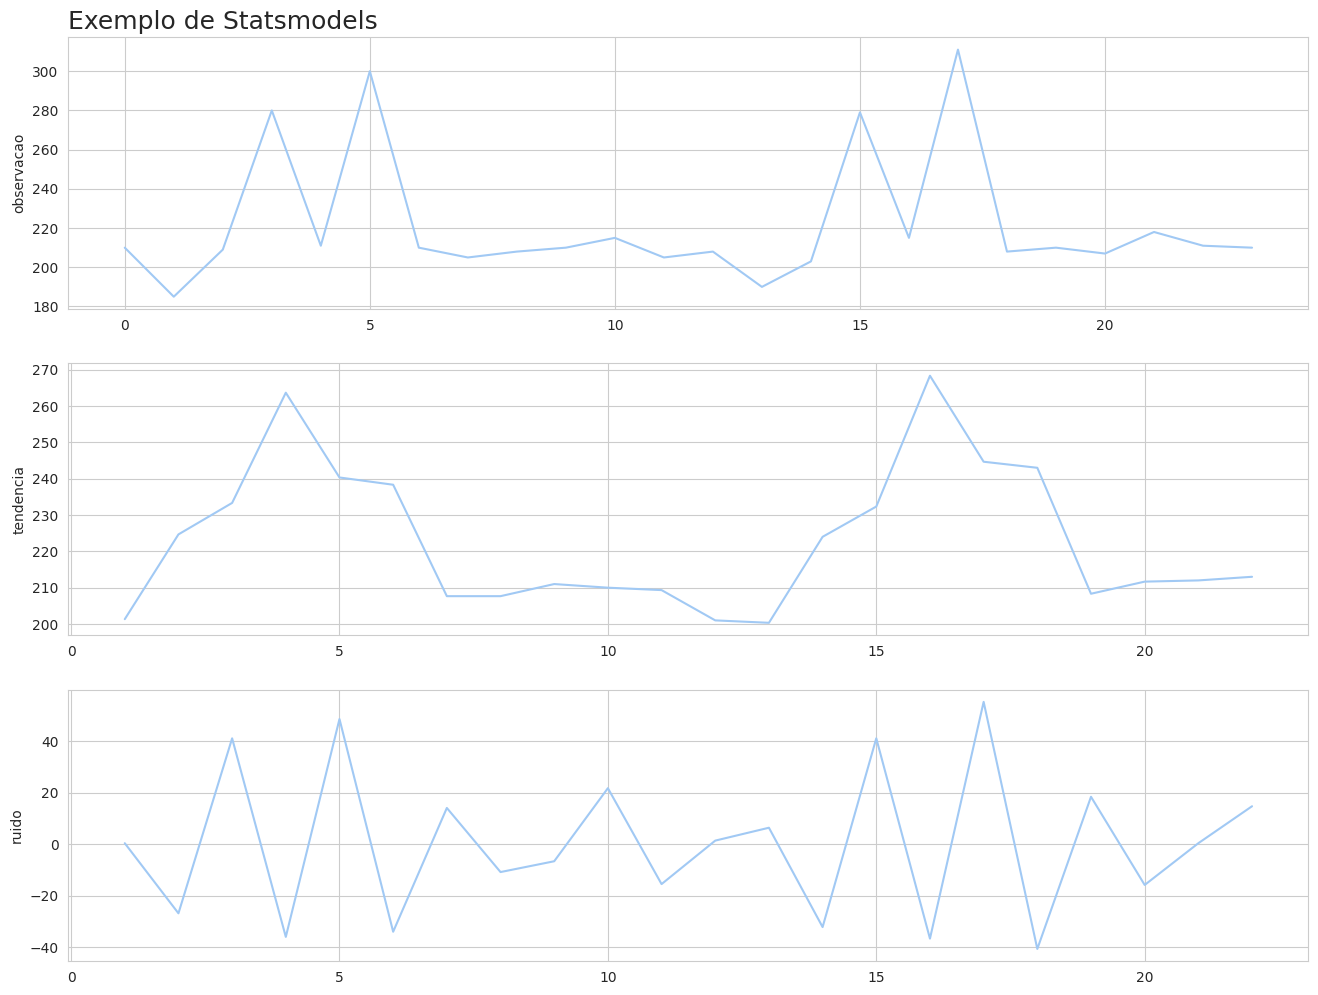

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

## **DiRWA Mobile Company - Ruído**

Nos foram passados os dados de uma determinada empresa do ramo de telefonia e celulares. Foi pedido que avaliássemos o rendimento da empresa.

### Análise Descritiva

In [ ]:
mobile = pd.read_csv('dirwa_mob.csv')
mobile.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
mobile['dia'] = pd.to_datetime(mobile['dia'])
mobile.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', mobile.shape)
print('Quantidade de dados nulos:', mobile.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
mobile ['aumento'] = mobile ['vendas'].diff()
mobile ['aceleracao'] = mobile ['aumento'].diff()

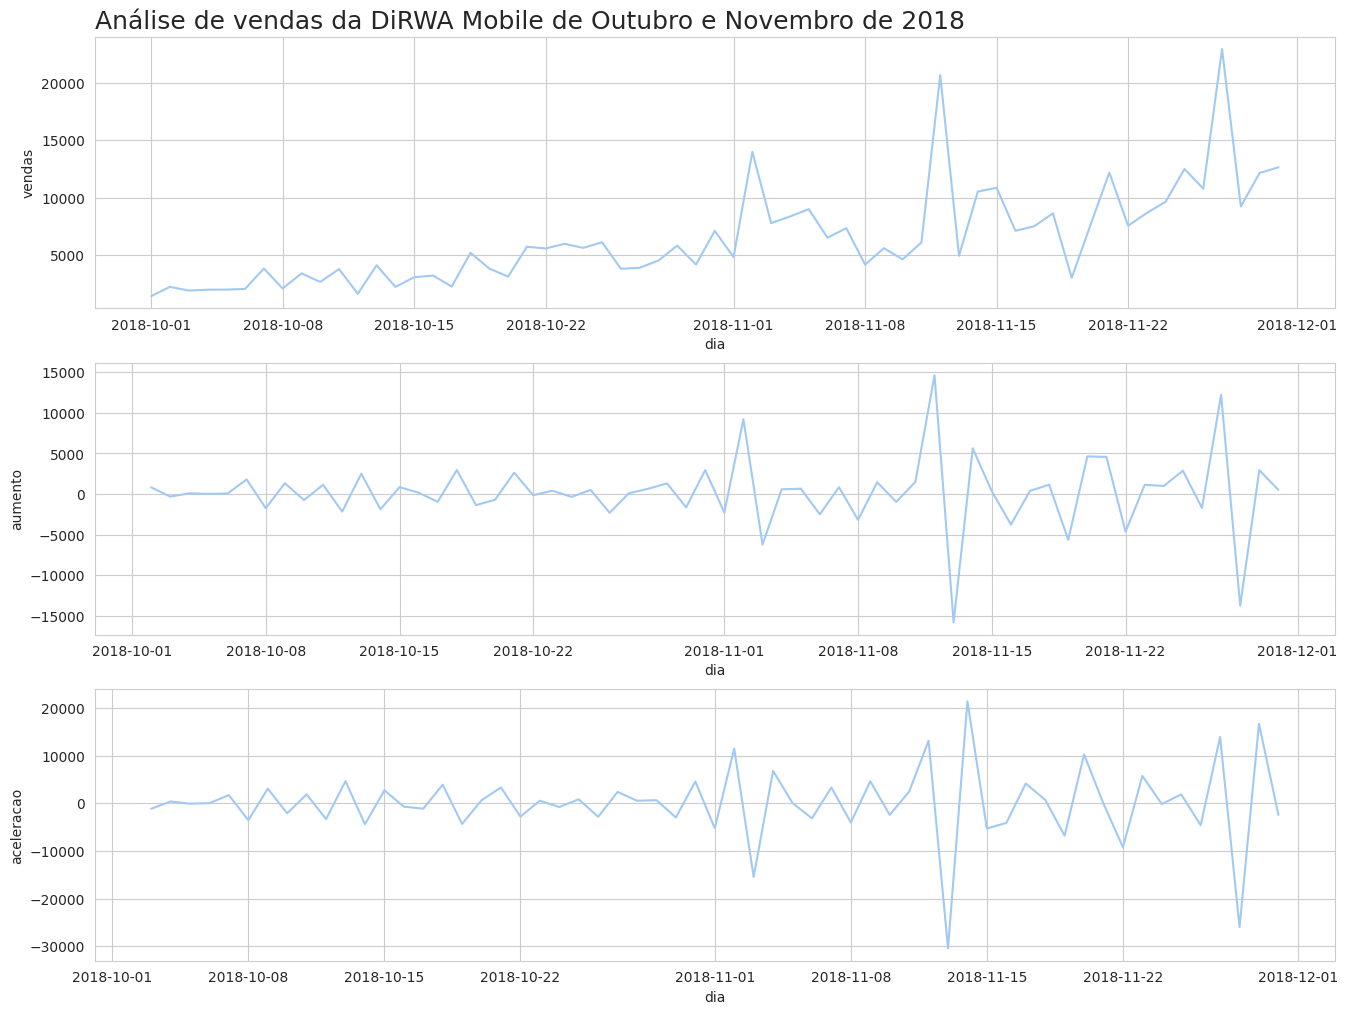

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', mobile, 'Análise de vendas da DiRWA Mobile de Outubro e Novembro de 2018')

**Média Móvel**

In [ ]:
mobile['media_movel'] = mobile['vendas'].rolling(7).mean()
mobile.head(14)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


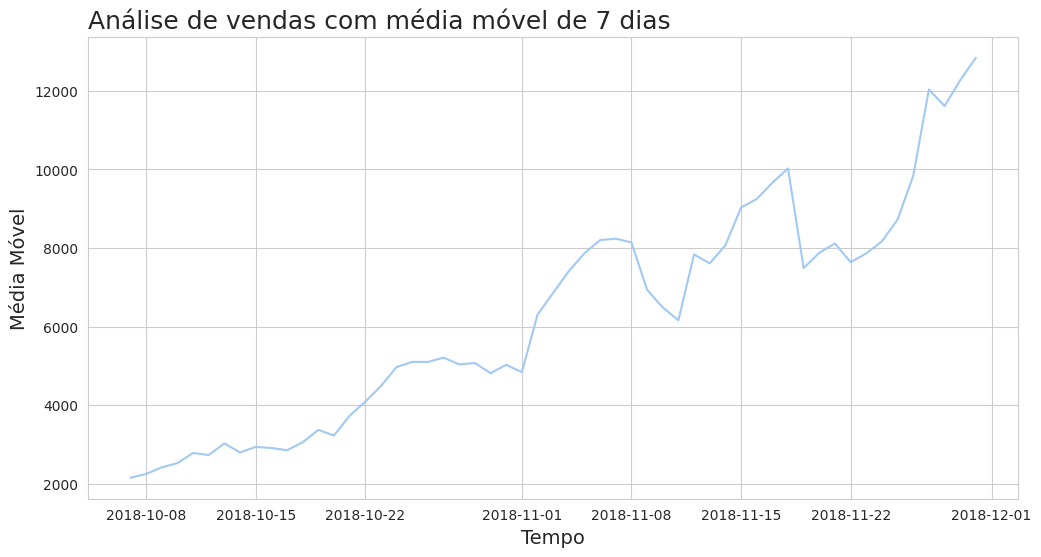

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo',
       'Média Móvel', 'dia', 'media_movel', mobile)

In [ ]:
mobile['media_movel_21'] = mobile['vendas'].rolling(21).mean()
mobile.head(28)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


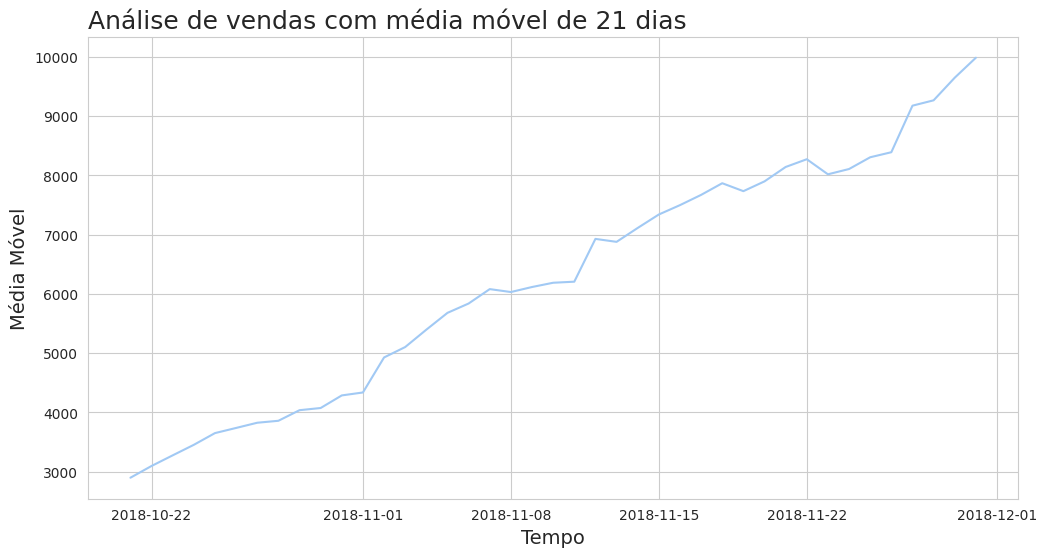

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo',
       'Média Móvel', 'dia', 'media_movel_21', mobile)

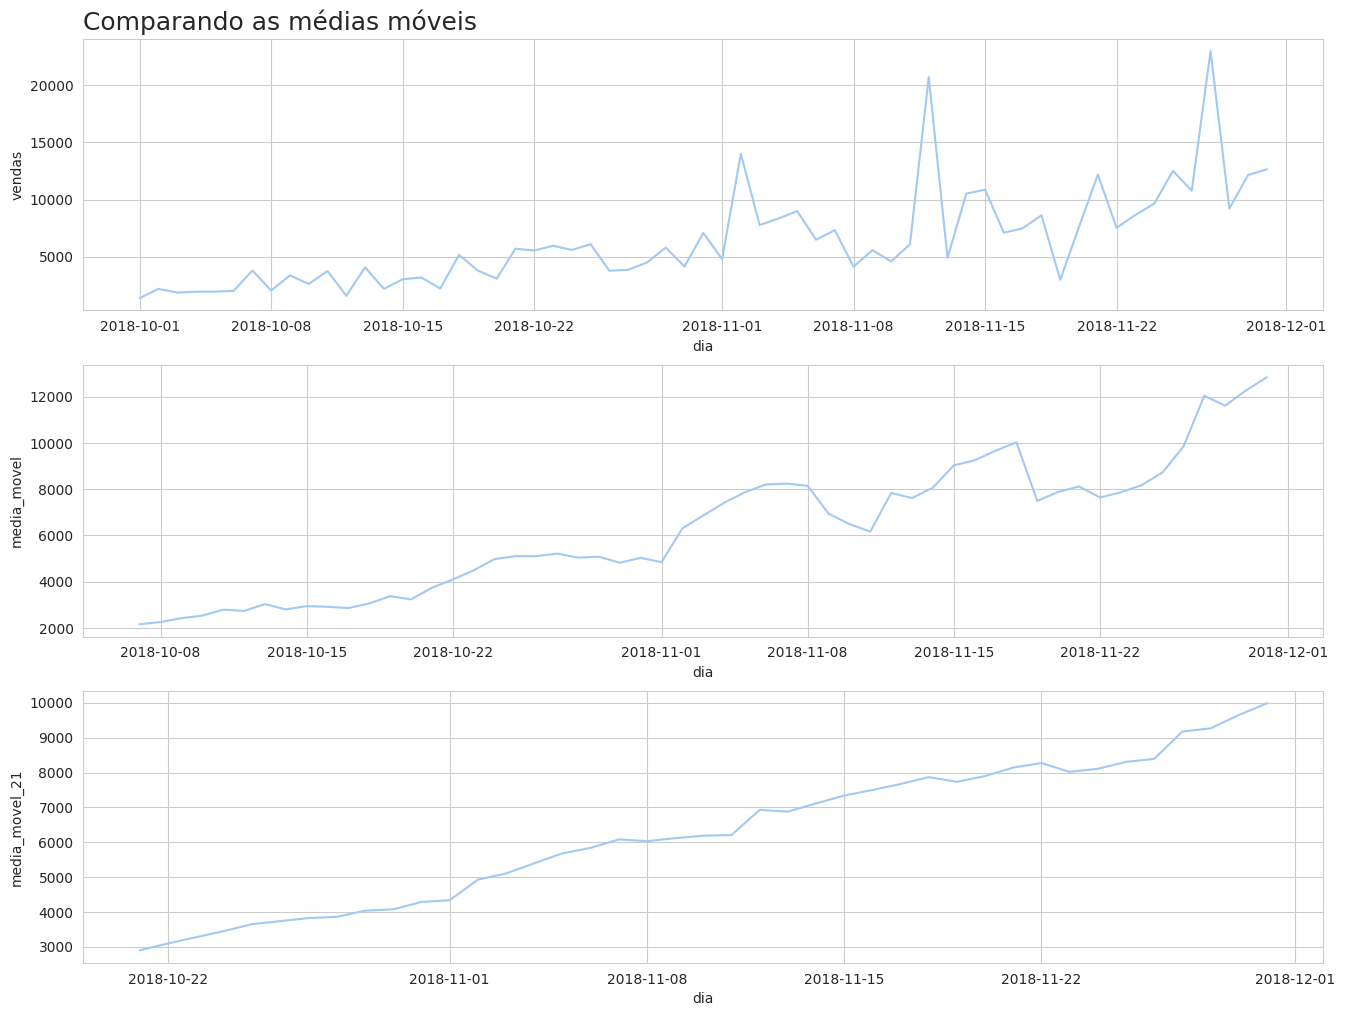

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', mobile, 'Comparando as médias móveis')

## **Quando não aplicar análise de séries temporais**

A análise de séries temporais é uma ferramenta poderosa para dados que são dependentes do tempo, mas existem situações em que ela pode não ser aplicável ou útil. Abaixo estão algumas circunstâncias em que a análise de séries temporais pode não ser apropriada:

1. **Dados Não Temporais**: Se os dados não forem sequenciais no tempo ou se a ordem dos dados não importar, a análise de séries temporais não é aplicável.

2. **Falta de Dependência Temporal**: Se não houver dependência entre os valores em momentos diferentes (por exemplo, dados de corte transversal independentes), a análise de séries temporais não trará insights úteis.

3. **Dados com Poucos Pontos Temporais**: A análise de séries temporais geralmente requer uma quantidade suficiente de pontos de dados para identificar padrões como tendências e sazonalidade. Poucas observações podem não fornecer a base necessária para uma análise significativa.

4. **Dados Não Estacionários sem Possibilidade de Transformação**: Embora muitos métodos possam lidar com séries não estacionárias, há casos em que a não estacionariedade não pode ser facilmente corrigida, tornando os métodos de séries temporais menos eficazes.

5. **Altos Níveis de Ruído**: Se os dados contêm altos níveis de variabilidade aleatória ou ruído que não pode ser modelado ou explicado, a análise de séries temporais pode ser incapaz de identificar os padrões subjacentes.

6. **Intervenções Externas**: Quando há intervenções externas frequentes e imprevisíveis que afetam os dados (como mudanças de política econômica ou desastres naturais), pode ser difícil modelar e prever o comportamento da série temporal.

7. **Falta de Teoria ou Hipótese Subjacente**: A análise de séries temporais deve ser guiada por alguma teoria ou hipótese sobre o comportamento dos dados ao longo do tempo. Sem isso, a análise pode ser apenas uma exploração de dados sem conclusões significativas.

8. **Dados Espaciais ou de Painel**: Quando os dados têm uma forte componente espacial ou são dados de painel (com dimensões de tempo e de indivíduos/grupos), modelos específicos para esses tipos de dados podem ser mais adequados do que a análise de séries temporais tradicional.

9. **Sistemas Altamente Dinâmicos**: Em sistemas complexos e altamente dinâmicos, onde as variáveis estão em constante mudança e interagem de maneiras não lineares e não previsíveis, métodos de séries temporais clássicos podem não ser suficientes.

10. **Ética e Privacidade**: Se a coleta ou análise de dados temporais violar a privacidade ou a ética, como no caso de monitoramento invasivo, então ela não deve ser realizada.

Em todos esses casos, pode ser mais adequado considerar outros métodos de análise ou coleta de dados adicionais que possam tornar a análise de séries temporais viável e informativa.

Exemplos gráficos:

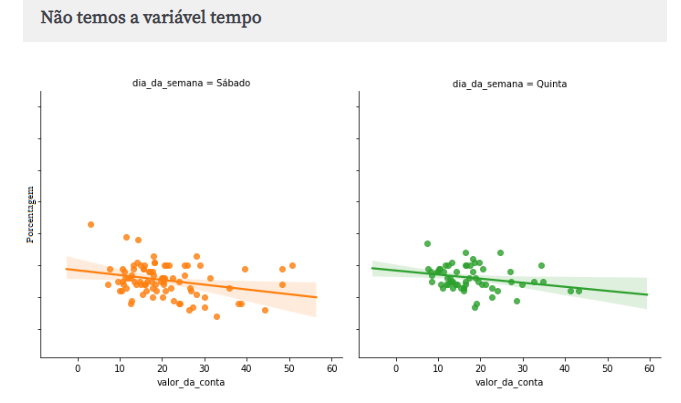

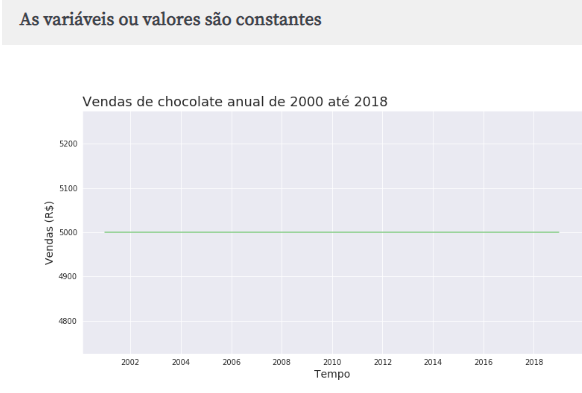

# **Métricas**

A escolha da melhor métrica para avaliar modelos de séries temporais usando Machine Learning (ML) ou Redes Neurais Recorrentes (RNN) depende da natureza do problema, dos dados e dos objetivos específicos do modelo. Aqui estão algumas métricas comumente utilizadas:


1. **Erro Quadrático Médio (MSE)**
   - **Fórmula**: $ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
   - **Exemplo de Aplicação**: O MSE é frequentemente usado em finanças para avaliar o desempenho de modelos de previsão de preços de ativos. Um valor baixo de MSE em um conjunto de teste pode indicar que o modelo é bom em prever preços com precisão.

2. **Raiz do Erro Quadrático Médio (RMSE)**
   - **Fórmula**: $ RMSE = \sqrt{MSE} $
   - **Exemplo de Aplicação**: O RMSE é comum na meteorologia para avaliar modelos de previsão do tempo. Por exemplo, um meteorologista pode usar o RMSE para comparar a precisão das previsões de temperatura de diferentes modelos.

3. **Erro Absoluto Médio (MAE)**
   - **Fórmula**: $ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $
   - **Exemplo de Aplicação**: O MAE pode ser usado em sistemas de recomendação para medir a diferença média entre as classificações previstas e as reais dadas pelos usuários, fornecendo uma medida clara de quão bem o sistema prevê as preferências dos usuários.

4. **Erro Percentual Absoluto Médio (MAPE)**
   - **Fórmula**: $ MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| $
   - **Exemplo de Aplicação**: O MAPE é útil no varejo para previsões de demanda de estoque, onde as previsões precisas são cruciais para garantir que não haja excesso nem falta de produtos.

5. **Erro Quadrático Médio Logarítmico (MSLE)**
   - **Fórmula**: $ MSLE = \frac{1}{n} \sum_{i=1}^{n} (\log(1 + y_i) - \log(1 + \hat{y}_i))^2 $
   - **Exemplo de Aplicação**: O MSLE é adequado para modelar preços de imóveis, onde superestimar o preço de uma casa barata é proporcionalmente mais prejudicial do que superestimar o preço de uma casa cara.

6. **Coeficiente de Determinação (R²)**
   - **Fórmula**: $ R² = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $
   - **Exemplo de Aplicação**: R² pode ser usado para avaliar o desempenho de modelos econômicos que preveem o crescimento do PIB com base em múltiplas variáveis econômicas independentes.

7. **Direcionalidade (Accuracy of Direction)**
   - **Fórmula**: Não existe uma fórmula padrão única; é mais uma medida de classificação do que uma métrica numérica.
   - **Exemplo de Aplicação**: Em trading algorítmico, é importante prever corretamente a direção do movimento do mercado. Um modelo pode ser avaliado com base na porcentagem de vezes que prevê corretamente se o mercado vai subir ou descer.

8. **Função de Perda de Quantil**
   - **Fórmula**: Para um quantil $ \tau $, a perda é $ L_\tau(y_i, \hat{y}_i) = \tau(y_i - \hat{y}_i)_+ + (1 - \tau)(\hat{y}_i - y_i)_+ $
   - **Exemplo de Aplicação**: A função de perda de quantil pode ser usada em previsão de demanda energética, onde diferentes custos são associados com a superestimação ou subestimação da demanda real.

9. **Diebold-Mariano Test**
   - **Fórmula

**: O teste compara as diferenças nas previsões de erro entre dois modelos.
   - **Exemplo de Aplicação**: Utilizado para comparar dois modelos de previsão financeira, como na previsão do retorno de diferentes ativos, para determinar qual modelo tem desempenho estatisticamente melhor.

Estas métricas são empregadas após o desenvolvimento do modelo para avaliar a sua precisão e são fundamentais para a fase de teste e validação em problemas de séries temporais.

# **Conclusão**

As séries temporais são uma ferramenta fundamental em diversos campos, desde a economia até a engenharia, passando pela meteorologia e além. A análise de séries temporais permite a compreensão dos padrões subjacentes nos dados coletados ao longo do tempo, facilitando a previsão de eventos futuros com base em observações passadas. Esta previsibilidade é crucial para a tomada de decisões informadas e estratégicas em negócios, política pública, planejamento financeiro e operações do dia a dia.

A capacidade de desmembrar uma série temporal em suas componentes inerentes — tendência, sazonalidade, ciclicidade e irregularidade — proporciona ideias valiosas sobre a dinâmica dos dados. Por exemplo, no comércio, a compreensão da sazonalidade pode otimizar o gerenciamento de estoque e maximizar as vendas. Na economia, a detecção de tendências pode sinalizar mudanças no ciclo econômico, permitindo que políticas fiscais e monetárias sejam adaptadas em conformidade.

Os modelos estatísticos desenvolvidos para séries temporais, como ARIMA e suas variações, ajudam a isolar essas características e quantificar a influência de variáveis passadas nas previsões futuras. Com a incorporação de técnicas de aprendizado de máquina e inteligência artificial, a precisão dessas previsões tem melhorado, abrindo novas possibilidades para análises mais sofisticadas e aplicações inovadoras.

No entanto, as séries temporais também apresentam desafios. A qualidade e a integridade dos dados são críticas, e a interpretação dos modelos requer uma compreensão sólida dos princípios estatísticos e do contexto subjacente aos dados. Além disso, a incerteza é uma parte inerente de qualquer previsão. Portanto, é essencial que as previsões de séries temporais sejam acompanhadas de estimativas de confiança, permitindo que os tomadores de decisão avaliem os riscos potenciais.

Em resumo, a análise de séries temporais é uma ferramenta poderosa que, se utilizada corretamente, pode oferecer uma vantagem competitiva significativa, antecipando tendências futuras, ajustando-se a padrões sazonais e respondendo proativamente às dinâmicas de mudança. Com o avanço contínuo das metodologias e o aumento do poder computacional, o futuro da análise de séries temporais é promissor, prometendo insights ainda mais profundos e aplicações em novas áreas de pesquisa e prática.

# **Referências**

- MORETTIN, P.A., TOLOI, C. M. C., Modelos para previsão de Séries Temporais, IMPA - Instituto de Matemática Pura e Aplicada, 1981. Disponível em: [link](https://impa.br/wp-content/uploads/2017/04/13_CBM_81_01.pdf);

- GALDINO. E., Análise e Previsão de Séries Temporais, Centro de Informaática - UFPE. [Aula 1](https://www.cin.ufpe.br/~psgmn/Series%20Temporais/Aula_02.pdf) e [Aula 2](https://www.cin.ufpe.br/~psgmn/Series%20Temporais/Aula_02.pdf);

- MIGON, H., Análise de Série Temporais, Instituto de Matemática - UFRJ. Disponível em: [link](http://www.dme.ufrj.br/dani/pdf/slidespartefrequentista.pdf);

- MENEZES, M., Análise de Séres Temporais - Instituto de Informática - UFSC. Disponível em: [link](https://www.inf.ufsc.br/~marcelo.menezes.reis/Cap4.pdf);

- NIELSEN, A., Practical Time Series Analysis, O'Reilly, 2020. Disponível em: [link](https://cloudflare-ipfs.com/ipfs/bafykbzaceajhmnmehz7amkjofpsxmsymk5u6ph4mrzytlp5zq7wf7ouhqkre2?filename=Aileen%20Nielsen%20-%20Practical%20Time%20Series%20Analysis_%20Prediction%20with%20Statistics%20and%20Machine%20Learning-O’Reilly%20Media%20%282019%29.pdf);

- Análise de Séries Temporais. Disponível em: [link](https://www.youtube.com/@AlexandreCunhaCosta/playlists).